In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import sqlite3

Here are the library that we used in our code:
- We used pandas to work with dataframes, and manipulate data.
- We used numpy to manipulate numerical data.
- We used matplotlib to visualize our data.

In [2]:
df = pd.read_csv('Air Pollution.csv')

Here we upload the data into our model.

In [3]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

Here we check our dataset if it is uploaded successfully or not by showing the first five lines.

In [4]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Here we check if our dataset has any NULL values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


The above code provides a short description of our dataset, including column names, column types, number of rows, and memory usage.

In [6]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

The above code provides descriptive statistics about the dataset.

In [10]:
grouped_df = df.groupby('Air Quality')['Proximity_to_Industrial_Areas'].agg(['mean'])
print(grouped_df)

                  mean
Air Quality           
Good         11.987900
Hazardous     4.592400
Moderate      6.958667
Poor          5.417000


In this step, we calculate the mean of "Proximity to Industrial Areas" grouped by "Air Quality".

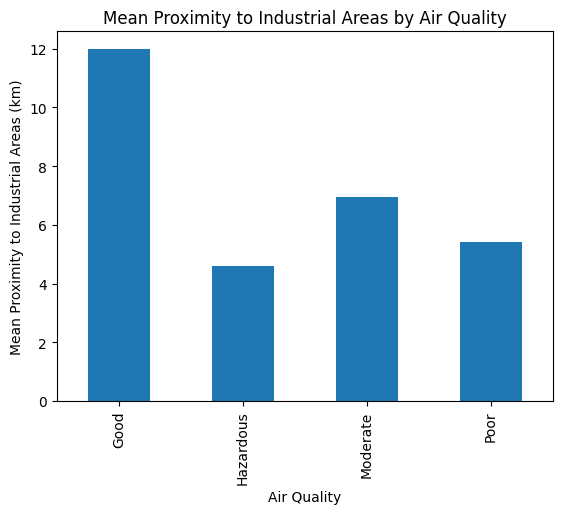

In [13]:
grouped_df.plot(kind='bar', legend=False)
plt.xlabel('Air Quality')
plt.ylabel('Mean Proximity to Industrial Areas (km)')
plt.title('Mean Proximity to Industrial Areas by Air Quality')
plt.show()

This diagram shows the results of the calcualtion above.

In [14]:
grouped_df = df.groupby('Air Quality')['NO2'].agg(['mean'])
print(grouped_df)

                  mean
Air Quality           
Good         19.448450
Hazardous    40.596200
Moderate     26.435133
Poor         33.212800


Here we do the same thing that we did for "Proximity to Industrial Areas" but for "NO2".

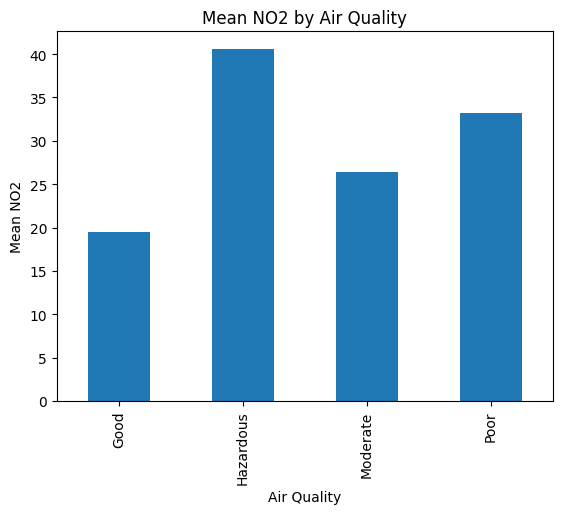

In [16]:
grouped_df.plot(kind='bar', legend=False)
plt.xlabel('Air Quality')
plt.ylabel('Mean NO2')
plt.title('Mean NO2 by Air Quality')
plt.show()

In [17]:
grouped_df = df.groupby('Air Quality')['CO'].agg(['mean'])
print(grouped_df)

                 mean
Air Quality          
Good         0.999590
Hazardous    2.491240
Moderate     1.505293
Poor         1.999030


Here we did it for "CO".

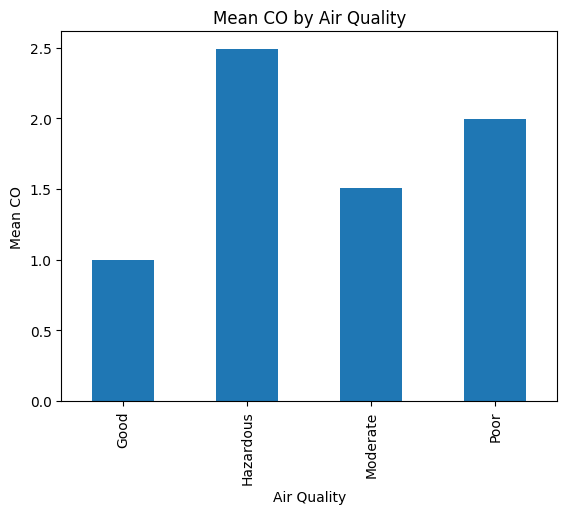

In [18]:
grouped_df.plot(kind='bar', legend=False)
plt.xlabel('Air Quality')
plt.ylabel('Mean CO')
plt.title('Mean CO by Air Quality')
plt.show()

In [21]:
grouped_df = df.groupby('Air Quality')['Population_Density'].agg(['mean'])
print(grouped_df.astype(int))

             mean
Air Quality      
Good          398
Hazardous     696
Moderate      497
Poor          594


Here we calculate the mean "Population Density" in each case of the air quality.

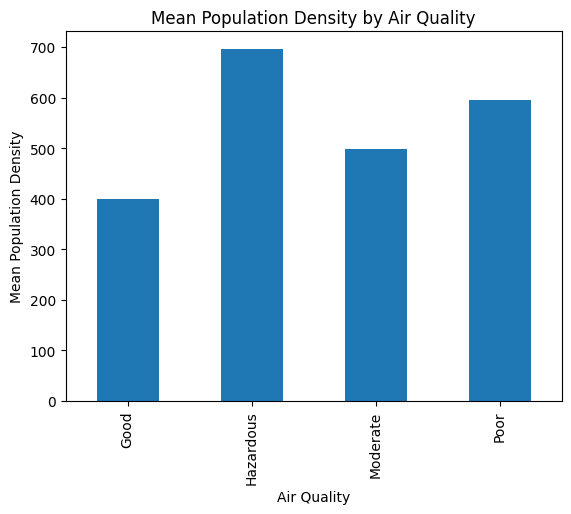

In [22]:
grouped_df.plot(kind='bar', legend=False)
plt.xlabel('Air Quality')
plt.ylabel('Mean Population Density')
plt.title('Mean Population Density by Air Quality')
plt.show()

In [32]:
corr_CO_Temp = df['CO'].corr(df['Temperature'])
corr_Temp_PD = df['Population_Density'].corr(df['Temperature'])
corr_Temp_PIA = df['Proximity_to_Industrial_Areas'].corr(df['Temperature'])
corr_PIA_CO = df['Proximity_to_Industrial_Areas'].corr(df['CO'])
print("Corr_CO_Temp  ",corr_CO_Temp)
print("Corr_Temp_PD  ",corr_Temp_PD)
print("Corr_Temp_PIA",corr_Temp_PIA)
print("Corr_PIA_CO  ",corr_PIA_CO)

Corr_CO_Temp   0.6852576048834067
Corr_Temp_PD   0.4816922292457682
Corr_Temp_PIA -0.5895637813856911
Corr_PIA_CO   -0.7075807300816188


Here we are calculating the correlation between the following pairs:
- The correlation between the CO and the Temperature.
- The correlation between the Temperature and Population Density.
- The correlation between the Temperature and Proximity to Industrial Aireas
- The correlation between the Proximity to Industrial Aireas and CO.

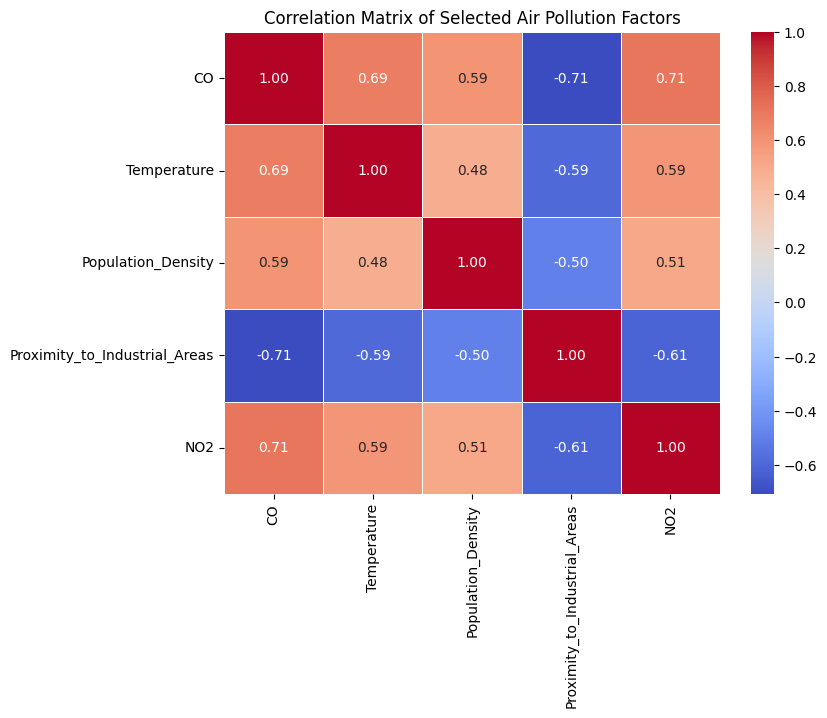

In [33]:
# prompt: Can you create a correlation diagram for the code above

import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns for correlation analysis
correlation_cols = ['CO', 'Temperature', 'Population_Density', 'Proximity_to_Industrial_Areas', 'NO2']

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Air Pollution Factors')
plt.show()

This heat map represent the relationships between the factors that effect the air quality.

In [27]:
air_quality_mapping = {'Good': 4, 'Moderate': 3, 'Poor': 2, 'Hazardous': 1}
df['Air_Quality_Numeric'] = df['Air Quality'].map(air_quality_mapping)
df_new = df.drop(columns=['Air Quality'])
print(df_new.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air_Quality_Numeric  
0                            6.3                 319                    3  
1                            6.0                 611                    3  
2                            5.2                 619                    3  
3                           11.1                 551                    4  
4                           12.7                 303                    4  


Here we convert the Air Quality column form words to numbers.

Performing regression for the following columns: ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

Regression of 'Humidity' on 'Temperature':
  Intercept: 36.99
  Coefficient for 'Temperature': 1.10
  Mean Squared Error: 196.86
  R-squared: 0.22


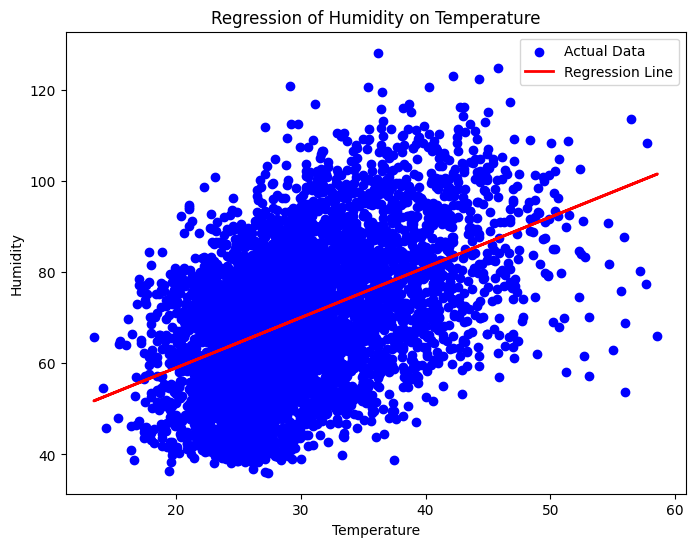

Regression of 'Temperature' on 'Humidity':
  Intercept: 16.18
  Coefficient for 'Humidity': 0.20
  Mean Squared Error: 35.33
  R-squared: 0.22


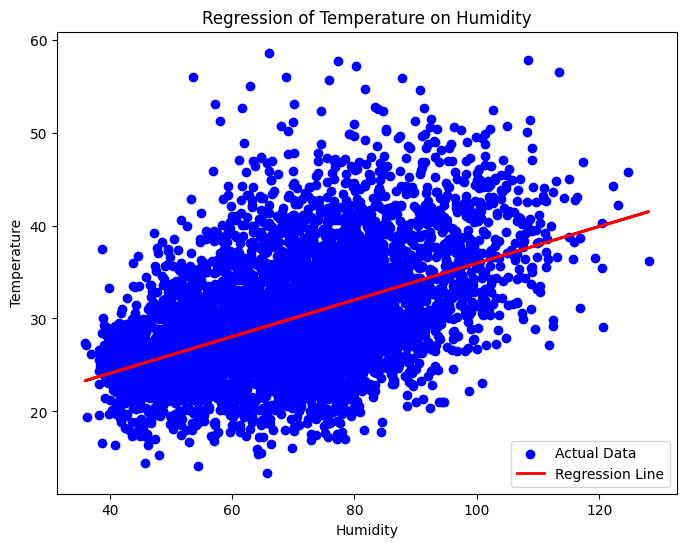


Regression of 'PM2.5' on 'Temperature':
  Intercept: -15.39
  Coefficient for 'Temperature': 1.18
  Mean Squared Error: 539.59
  R-squared: 0.10


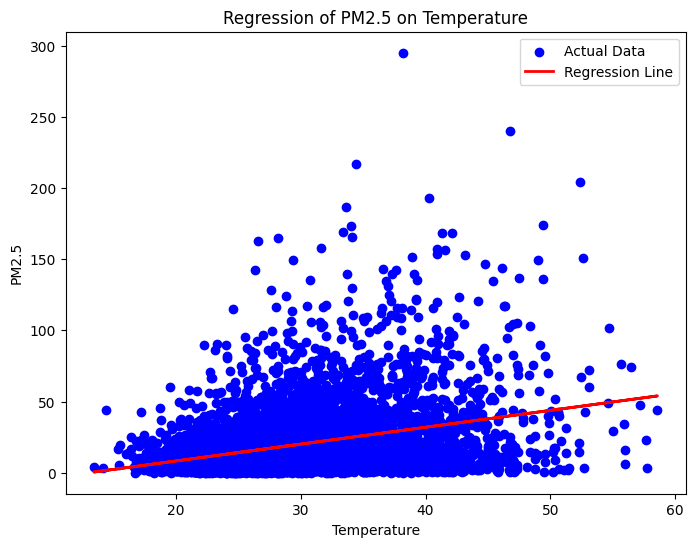

Regression of 'Temperature' on 'PM2.5':
  Intercept: 28.24
  Coefficient for 'PM2.5': 0.09
  Mean Squared Error: 40.42
  R-squared: 0.10


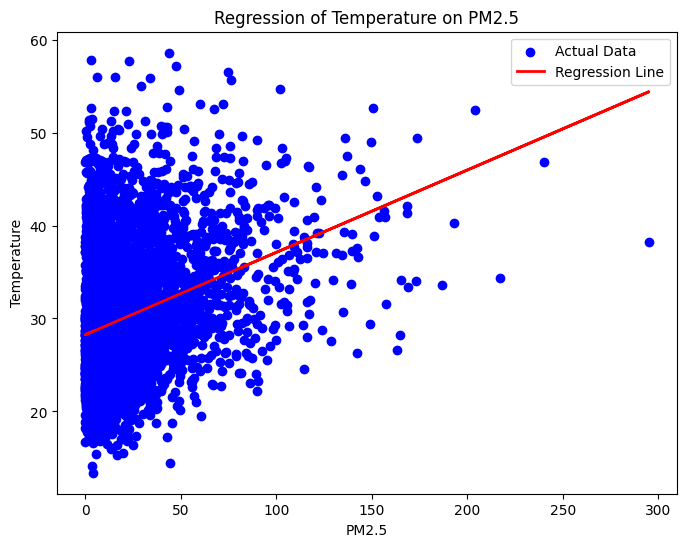


Regression of 'PM10' on 'Temperature':
  Intercept: -21.80
  Coefficient for 'Temperature': 1.73
  Mean Squared Error: 612.31
  R-squared: 0.18


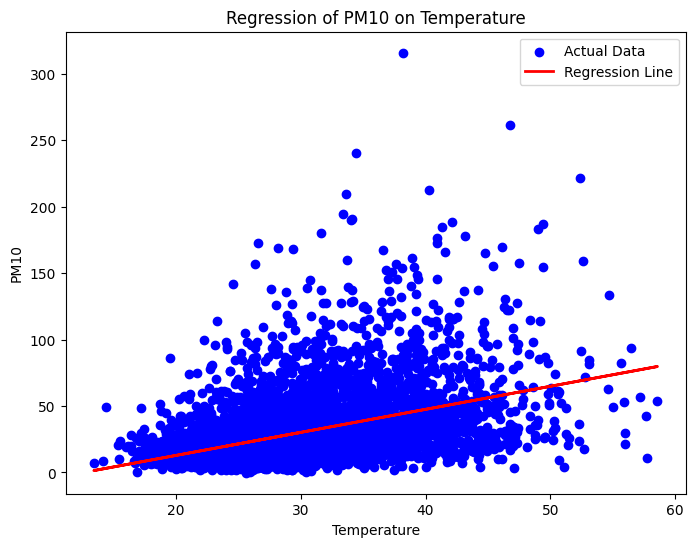

Regression of 'Temperature' on 'PM10':
  Intercept: 26.87
  Coefficient for 'PM10': 0.10
  Mean Squared Error: 36.98
  R-squared: 0.18


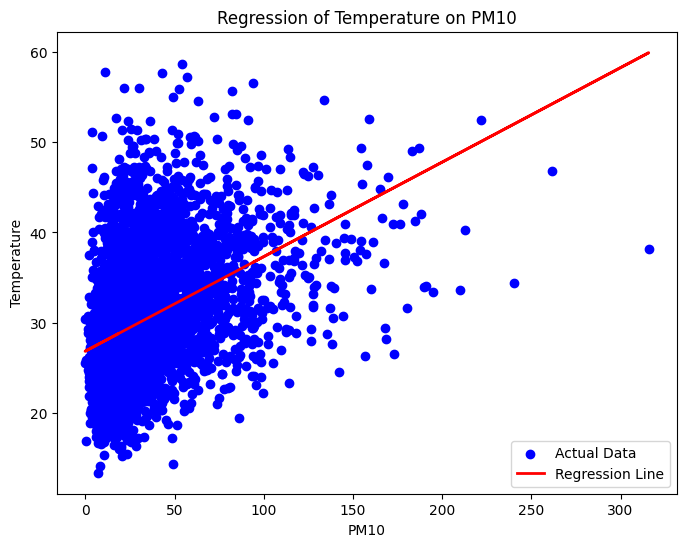


Regression of 'NO2' on 'Temperature':
  Intercept: 2.88
  Coefficient for 'Temperature': 0.78
  Mean Squared Error: 51.39
  R-squared: 0.35


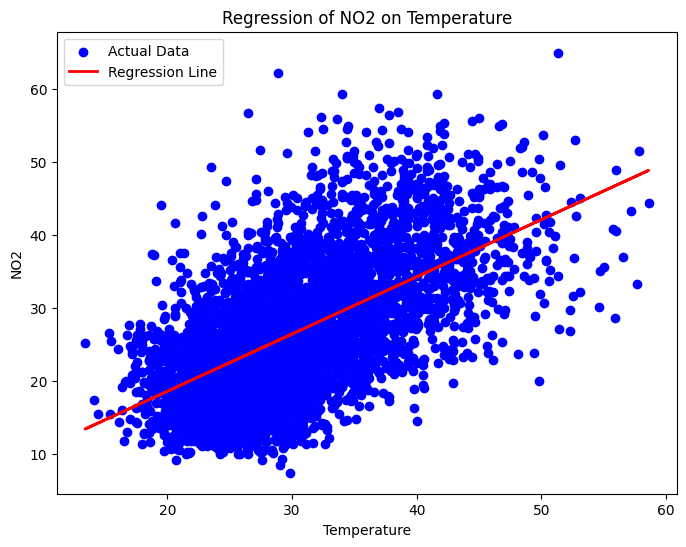

Regression of 'Temperature' on 'NO2':
  Intercept: 18.22
  Coefficient for 'NO2': 0.45
  Mean Squared Error: 29.33
  R-squared: 0.35


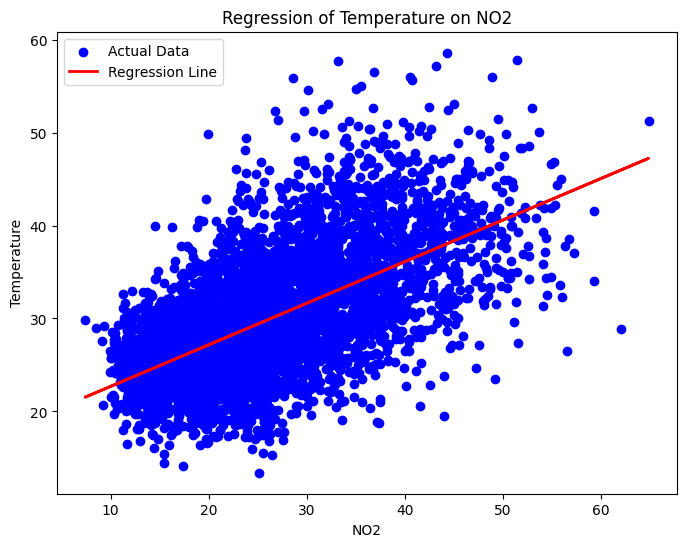


Regression of 'SO2' on 'Temperature':
  Intercept: -7.12
  Coefficient for 'Temperature': 0.57
  Mean Squared Error: 30.86
  R-squared: 0.32


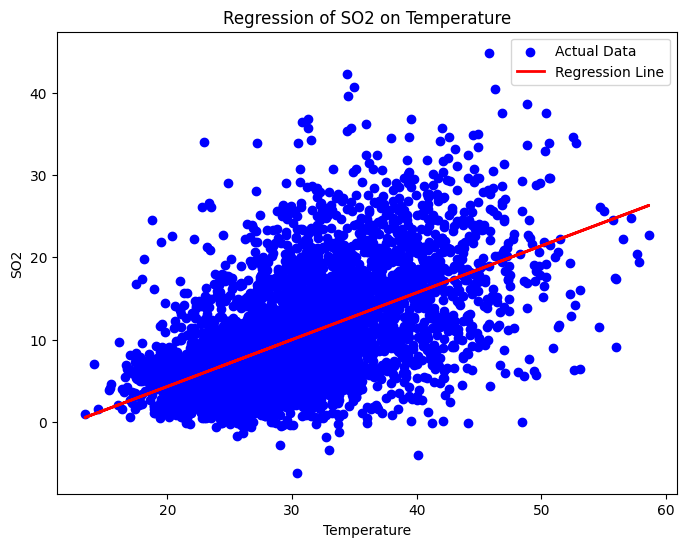

Regression of 'Temperature' on 'SO2':
  Intercept: 24.36
  Coefficient for 'SO2': 0.57
  Mean Squared Error: 30.58
  R-squared: 0.32


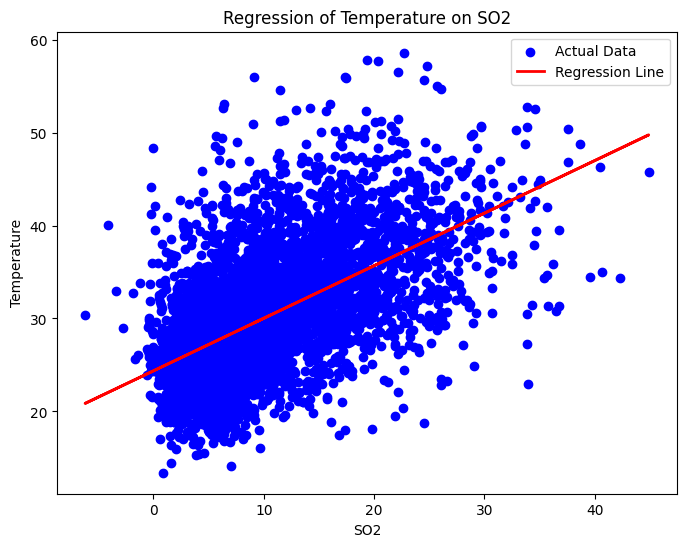


Regression of 'CO' on 'Temperature':
  Intercept: -0.17
  Coefficient for 'Temperature': 0.06
  Mean Squared Error: 0.16
  R-squared: 0.47


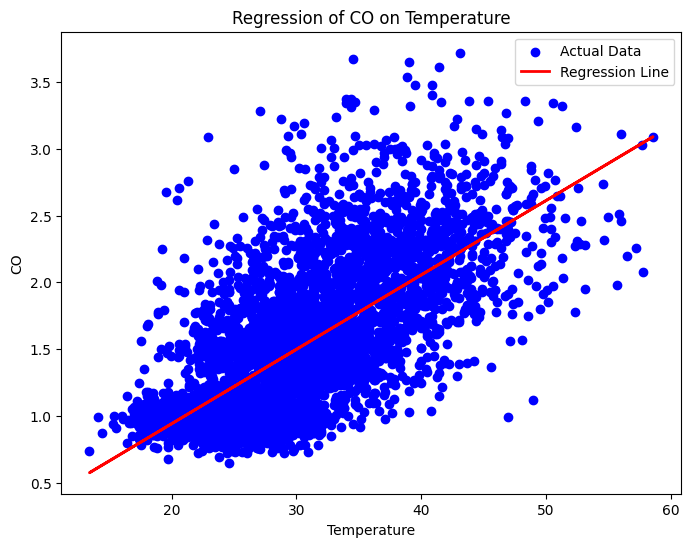

Regression of 'Temperature' on 'CO':
  Intercept: 17.37
  Coefficient for 'CO': 8.43
  Mean Squared Error: 23.95
  R-squared: 0.47


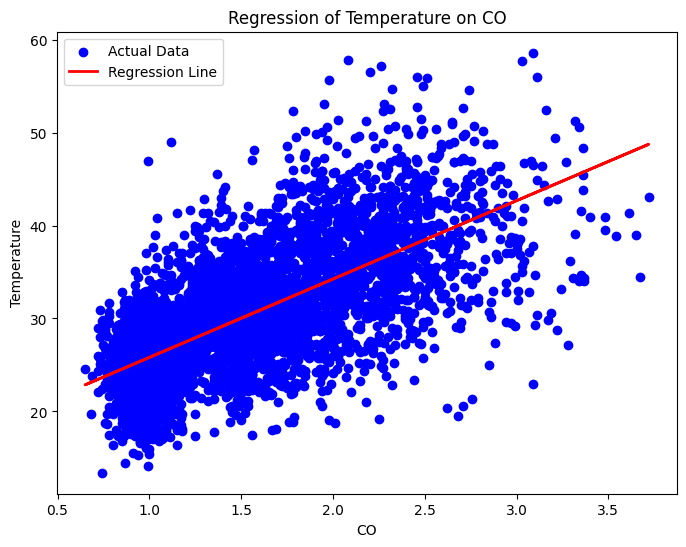


Regression of 'Proximity_to_Industrial_Areas' on 'Temperature':
  Intercept: 17.94
  Coefficient for 'Temperature': -0.32
  Mean Squared Error: 8.51
  R-squared: 0.35


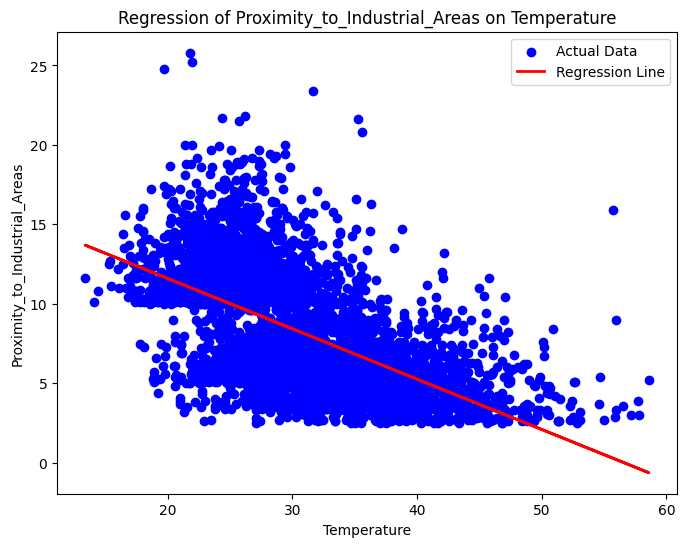

Regression of 'Temperature' on 'Proximity_to_Industrial_Areas':
  Intercept: 39.27
  Coefficient for 'Proximity_to_Industrial_Areas': -1.10
  Mean Squared Error: 29.46
  R-squared: 0.35


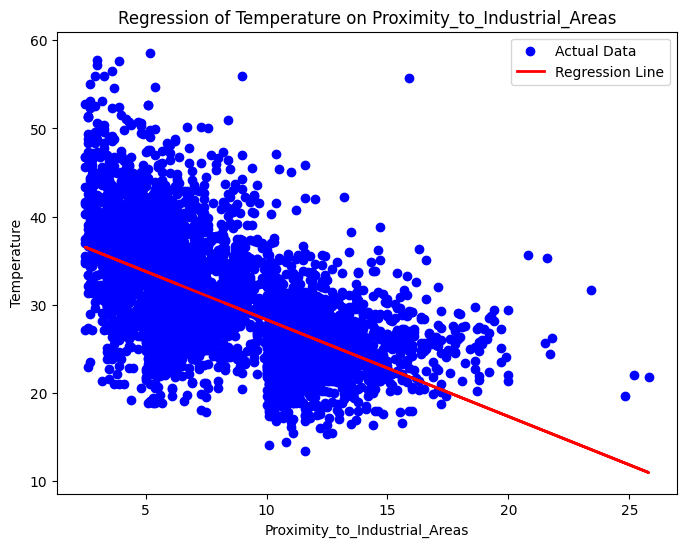


Regression of 'Population_Density' on 'Temperature':
  Intercept: 168.65
  Coefficient for 'Temperature': 10.95
  Mean Squared Error: 17916.14
  R-squared: 0.23


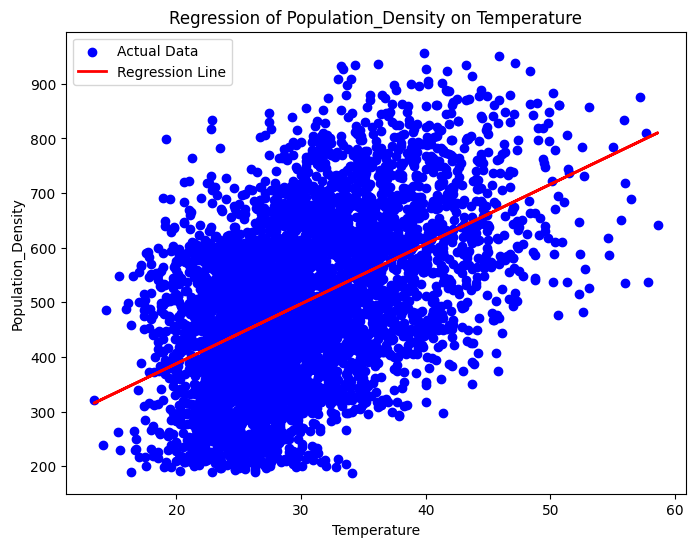

Regression of 'Temperature' on 'Population_Density':
  Intercept: 19.49
  Coefficient for 'Population_Density': 0.02
  Mean Squared Error: 34.68
  R-squared: 0.23


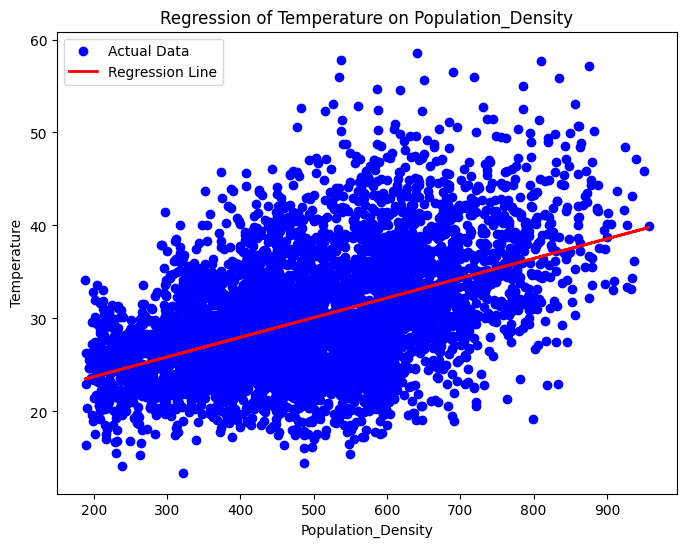


Regression of 'PM2.5' on 'Humidity':
  Intercept: -9.50
  Coefficient for 'Humidity': 0.42
  Mean Squared Error: 557.76
  R-squared: 0.07


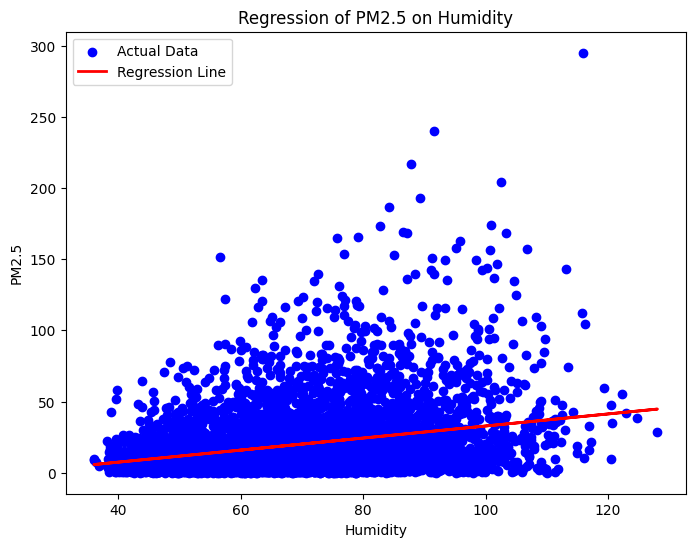

Regression of 'Humidity' on 'PM2.5':
  Intercept: 66.50
  Coefficient for 'PM2.5': 0.18
  Mean Squared Error: 232.80
  R-squared: 0.07


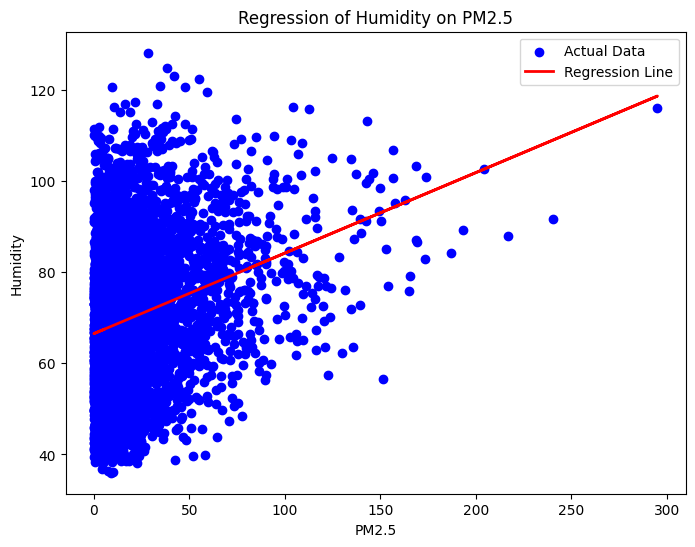


Regression of 'PM10' on 'Humidity':
  Intercept: -13.16
  Coefficient for 'Humidity': 0.62
  Mean Squared Error: 651.36
  R-squared: 0.13


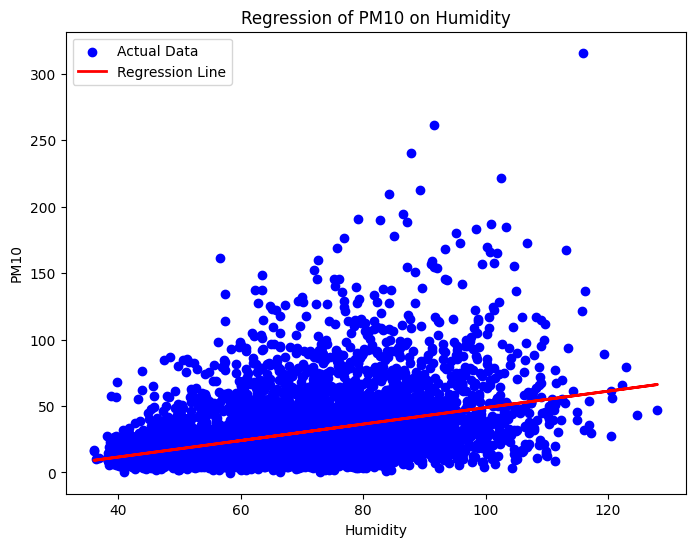

Regression of 'Humidity' on 'PM10':
  Intercept: 63.76
  Coefficient for 'PM10': 0.21
  Mean Squared Error: 219.15
  R-squared: 0.13


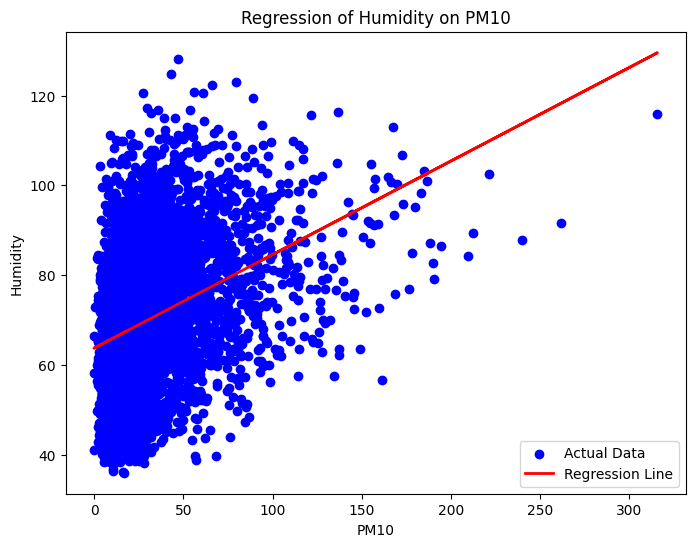


Regression of 'NO2' on 'Humidity':
  Intercept: 7.09
  Coefficient for 'Humidity': 0.28
  Mean Squared Error: 59.96
  R-squared: 0.24


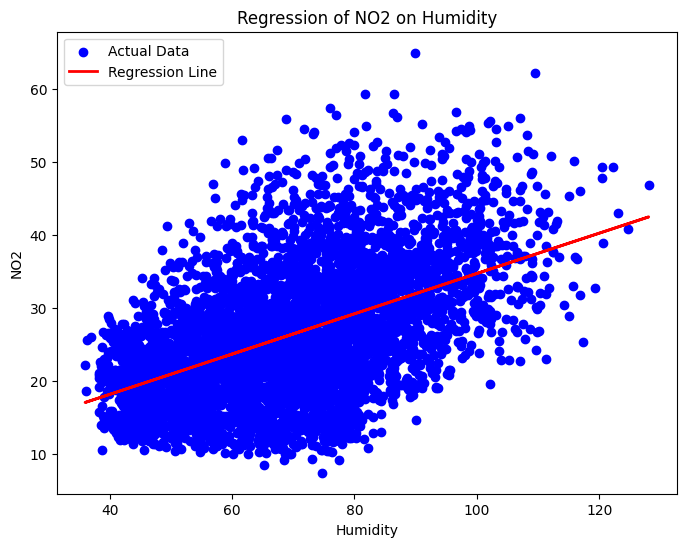

Regression of 'Humidity' on 'NO2':
  Intercept: 46.88
  Coefficient for 'NO2': 0.88
  Mean Squared Error: 190.70
  R-squared: 0.24


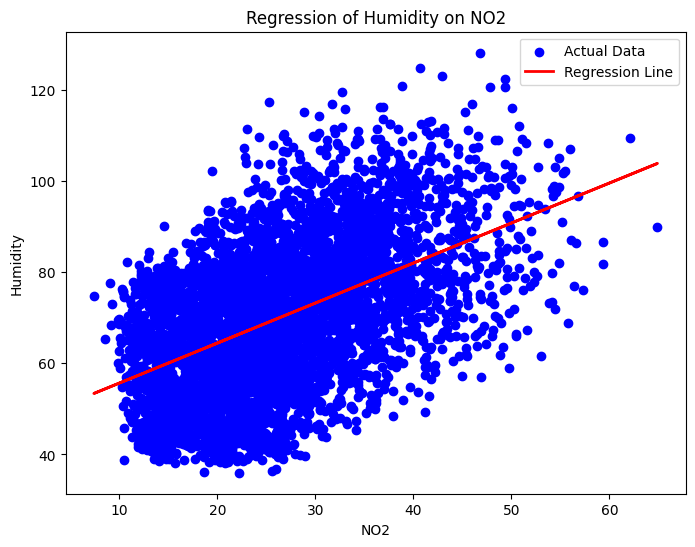


Regression of 'SO2' on 'Humidity':
  Intercept: -3.69
  Coefficient for 'Humidity': 0.20
  Mean Squared Error: 35.93
  R-squared: 0.21


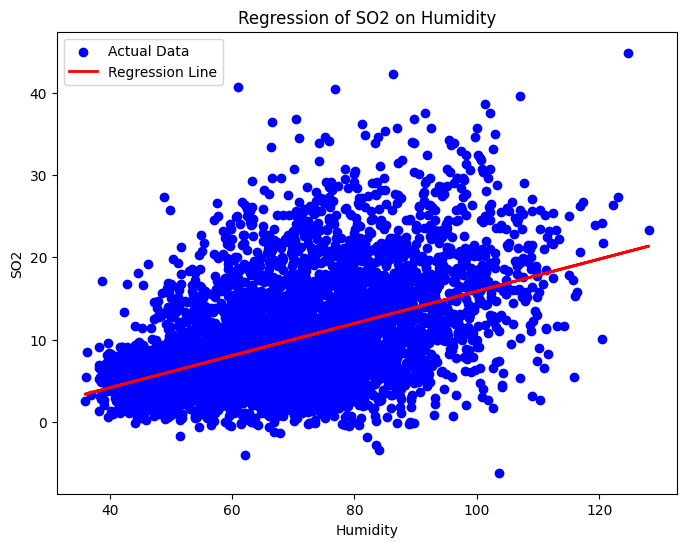

Regression of 'Humidity' on 'SO2':
  Intercept: 59.23
  Coefficient for 'SO2': 1.08
  Mean Squared Error: 198.41
  R-squared: 0.21


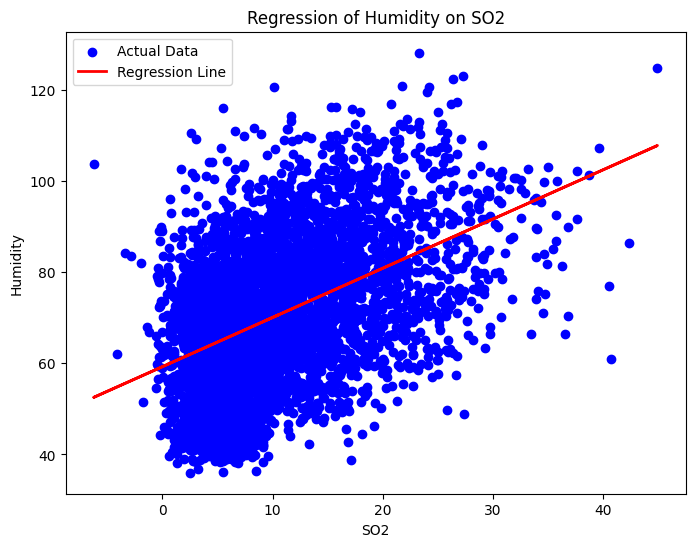


Regression of 'CO' on 'Humidity':
  Intercept: 0.13
  Coefficient for 'Humidity': 0.02
  Mean Squared Error: 0.20
  R-squared: 0.32


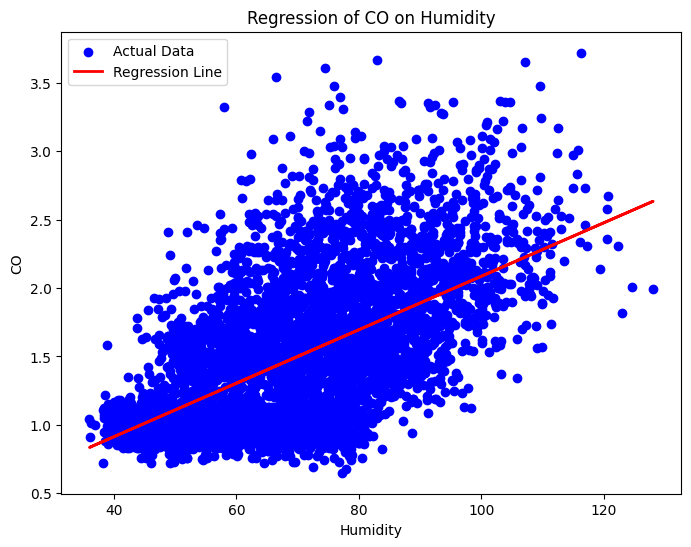

Regression of 'Humidity' on 'CO':
  Intercept: 45.32
  Coefficient for 'CO': 16.49
  Mean Squared Error: 170.56
  R-squared: 0.32


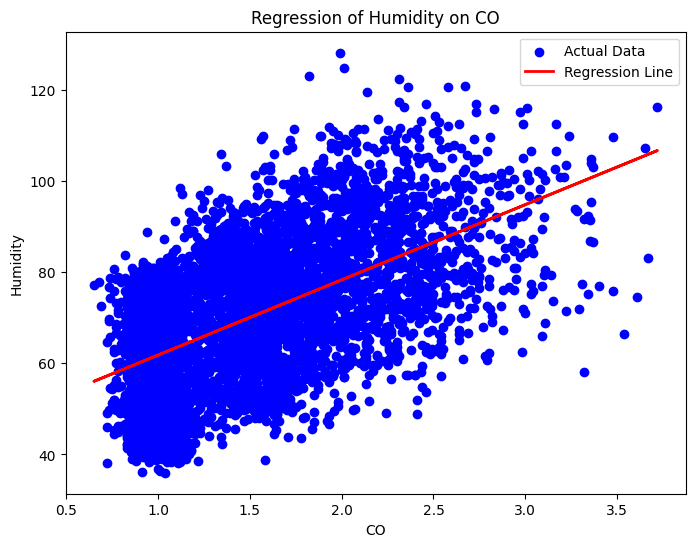


Regression of 'Proximity_to_Industrial_Areas' on 'Humidity':
  Intercept: 16.07
  Coefficient for 'Humidity': -0.11
  Mean Squared Error: 10.04
  R-squared: 0.23


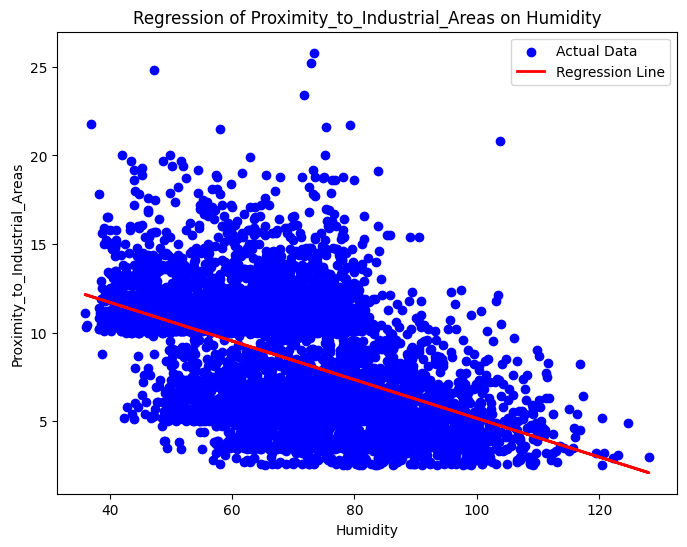

Regression of 'Humidity' on 'Proximity_to_Industrial_Areas':
  Intercept: 87.81
  Coefficient for 'Proximity_to_Industrial_Areas': -2.11
  Mean Squared Error: 193.72
  R-squared: 0.23


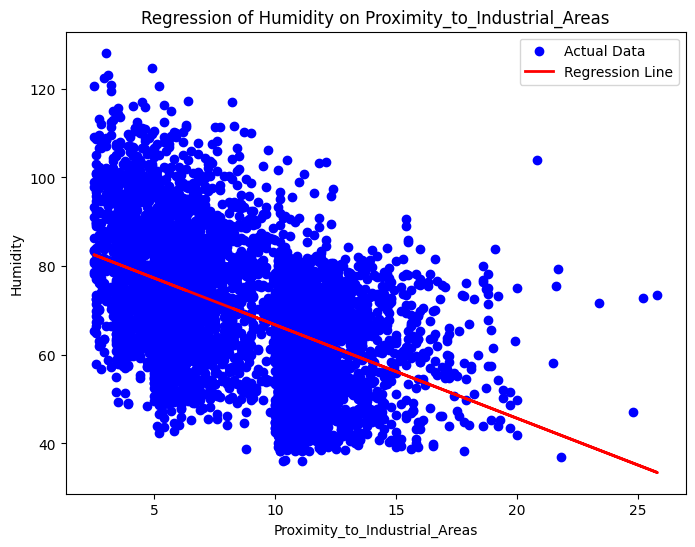


Regression of 'Population_Density' on 'Humidity':
  Intercept: 219.74
  Coefficient for 'Humidity': 3.96
  Mean Squared Error: 19376.28
  R-squared: 0.17


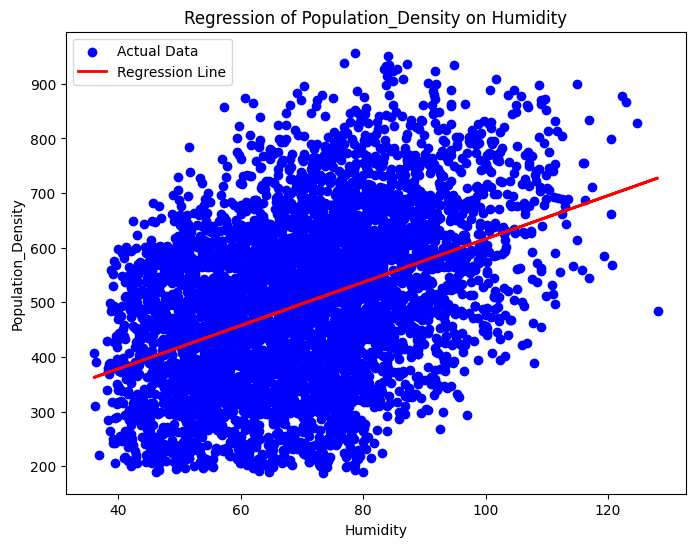

Regression of 'Humidity' on 'Population_Density':
  Intercept: 48.79
  Coefficient for 'Population_Density': 0.04
  Mean Squared Error: 208.97
  R-squared: 0.17


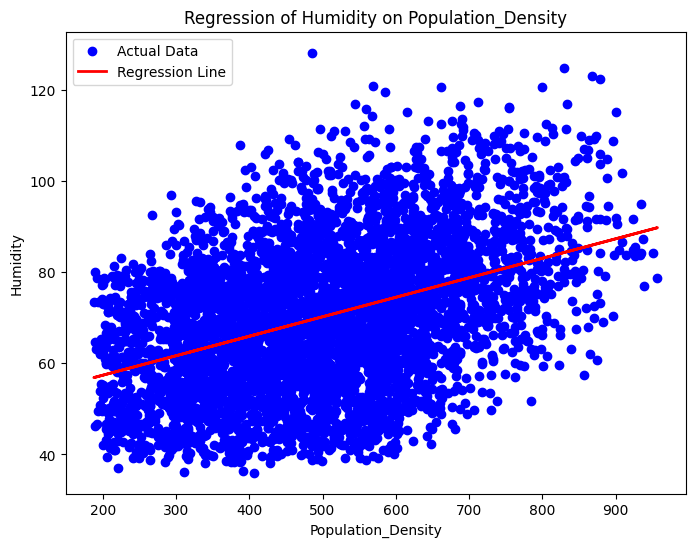


Regression of 'PM10' on 'PM2.5':
  Intercept: 8.39
  Coefficient for 'PM2.5': 1.08
  Mean Squared Error: 39.83
  R-squared: 0.95


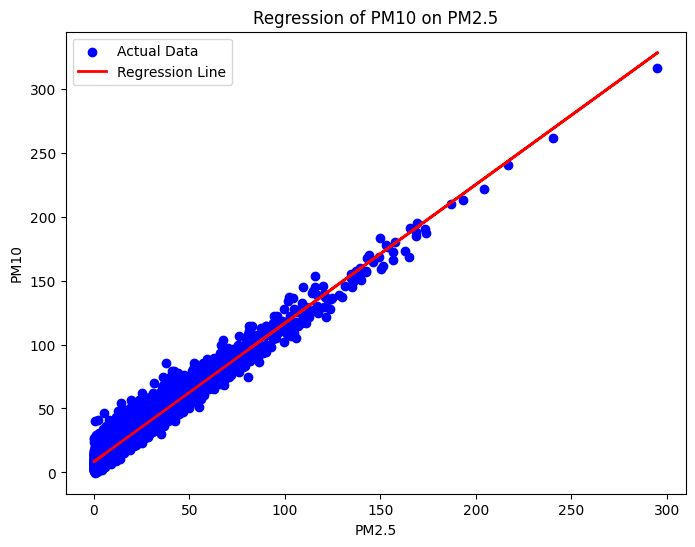

Regression of 'PM2.5' on 'PM10':
  Intercept: -6.26
  Coefficient for 'PM10': 0.87
  Mean Squared Error: 32.11
  R-squared: 0.95


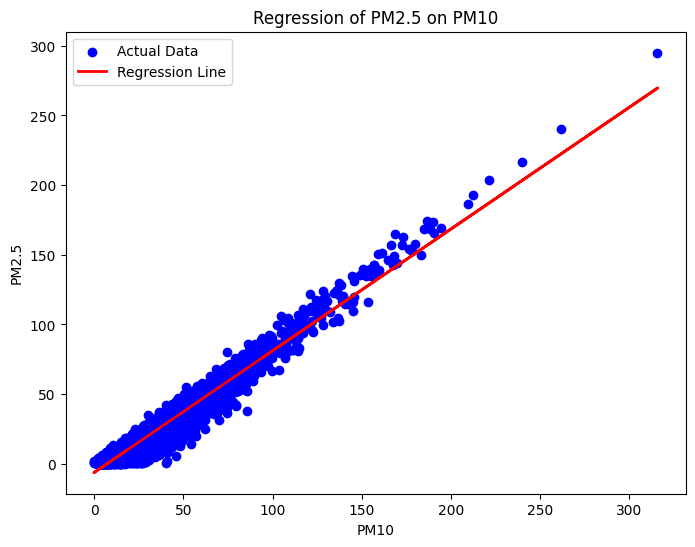


Regression of 'NO2' on 'PM2.5':
  Intercept: 23.98
  Coefficient for 'PM2.5': 0.12
  Mean Squared Error: 70.34
  R-squared: 0.11


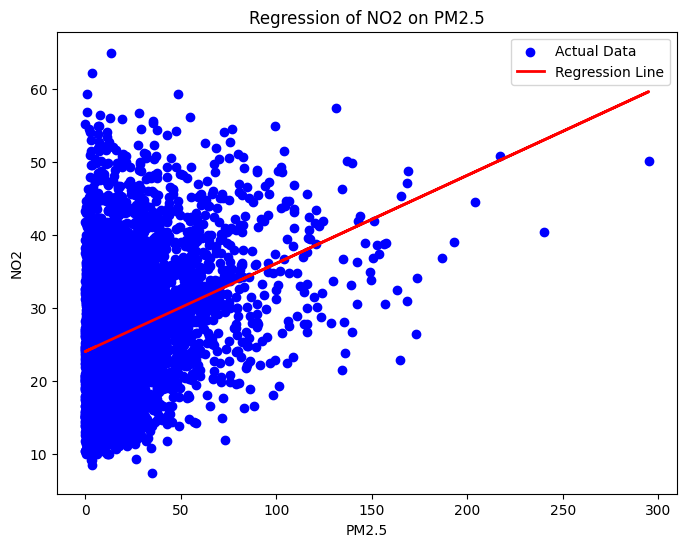

Regression of 'PM2.5' on 'NO2':
  Intercept: -4.14
  Coefficient for 'NO2': 0.92
  Mean Squared Error: 535.96
  R-squared: 0.11


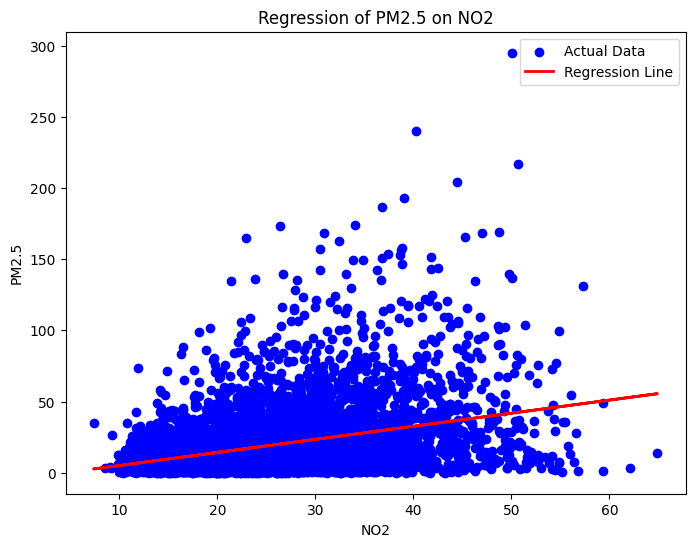


Regression of 'SO2' on 'PM2.5':
  Intercept: 8.36
  Coefficient for 'PM2.5': 0.08
  Mean Squared Error: 41.47
  R-squared: 0.09


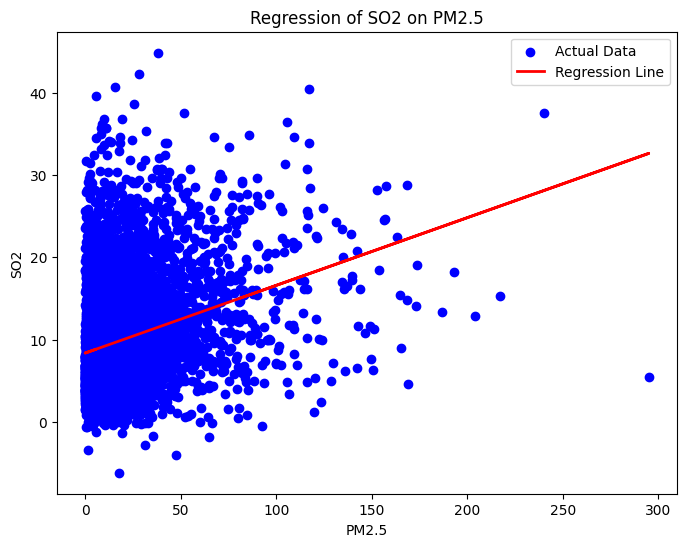

Regression of 'PM2.5' on 'SO2':
  Intercept: 9.23
  Coefficient for 'SO2': 1.09
  Mean Squared Error: 548.70
  R-squared: 0.09


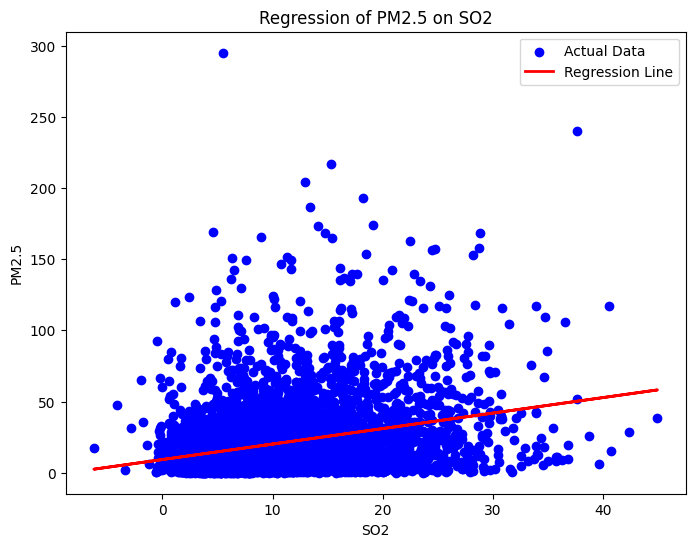


Regression of 'CO' on 'PM2.5':
  Intercept: 1.32
  Coefficient for 'PM2.5': 0.01
  Mean Squared Error: 0.25
  R-squared: 0.16


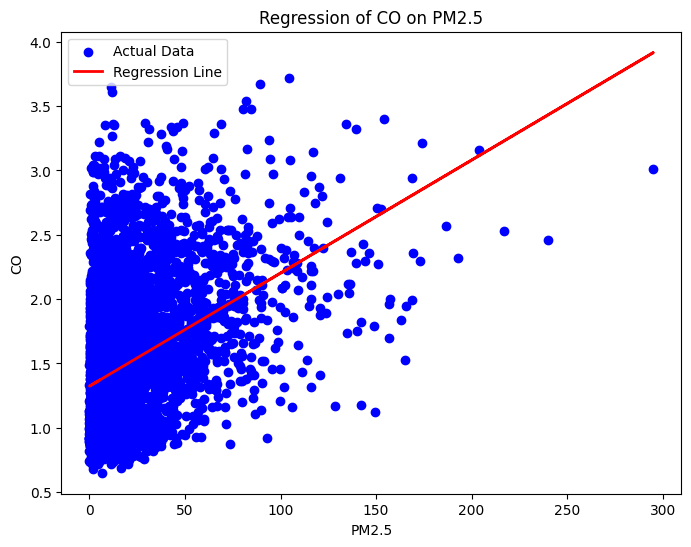

Regression of 'PM2.5' on 'CO':
  Intercept: -6.52
  Coefficient for 'CO': 17.77
  Mean Squared Error: 508.67
  R-squared: 0.16


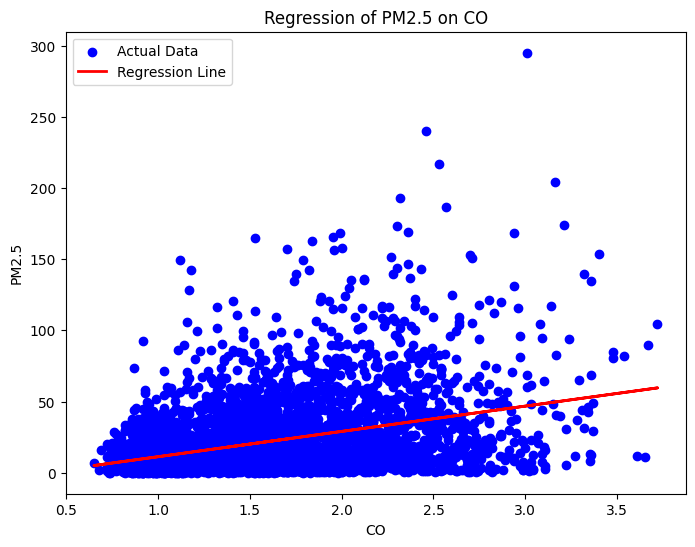


Regression of 'Proximity_to_Industrial_Areas' on 'PM2.5':
  Intercept: 9.36
  Coefficient for 'PM2.5': -0.05
  Mean Squared Error: 11.74
  R-squared: 0.10


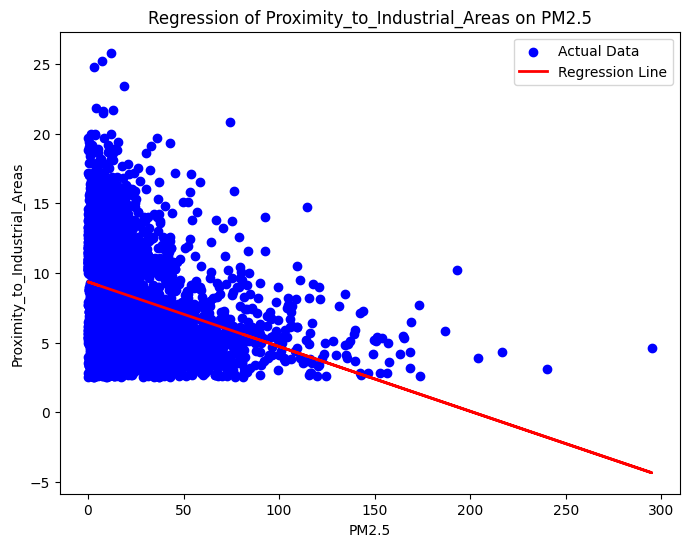

Regression of 'PM2.5' on 'Proximity_to_Industrial_Areas':
  Intercept: 38.23
  Coefficient for 'Proximity_to_Industrial_Areas': -2.15
  Mean Squared Error: 542.70
  R-squared: 0.10


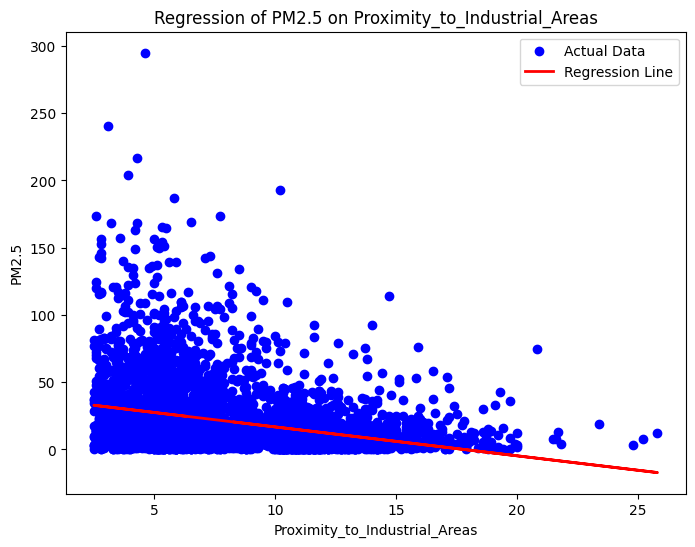


Regression of 'Population_Density' on 'PM2.5':
  Intercept: 462.47
  Coefficient for 'PM2.5': 1.74
  Mean Squared Error: 21513.73
  R-squared: 0.08


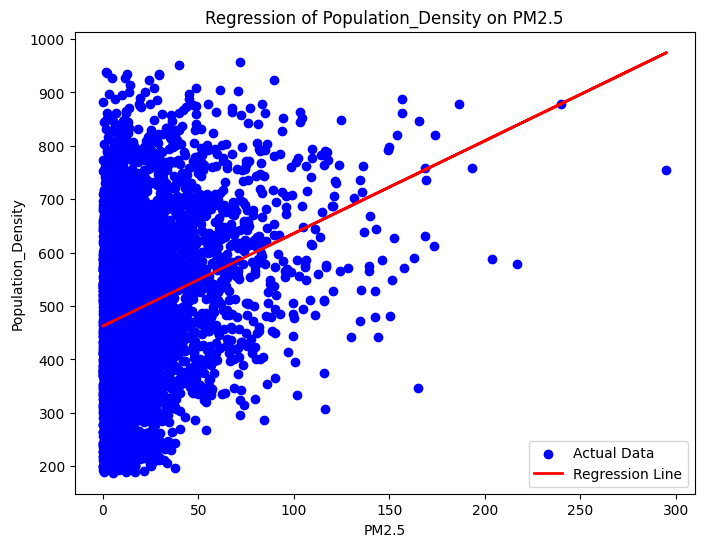

Regression of 'PM2.5' on 'Population_Density':
  Intercept: -2.16
  Coefficient for 'Population_Density': 0.04
  Mean Squared Error: 555.90
  R-squared: 0.08


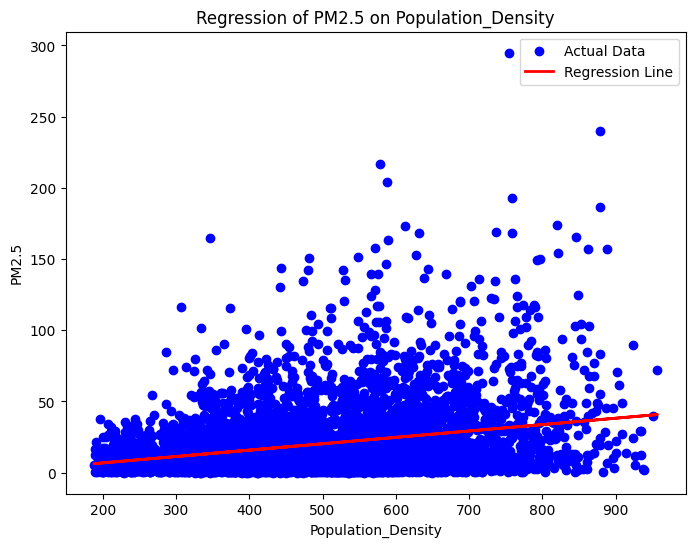


Regression of 'NO2' on 'PM10':
  Intercept: 22.09
  Coefficient for 'PM10': 0.14
  Mean Squared Error: 63.80
  R-squared: 0.19


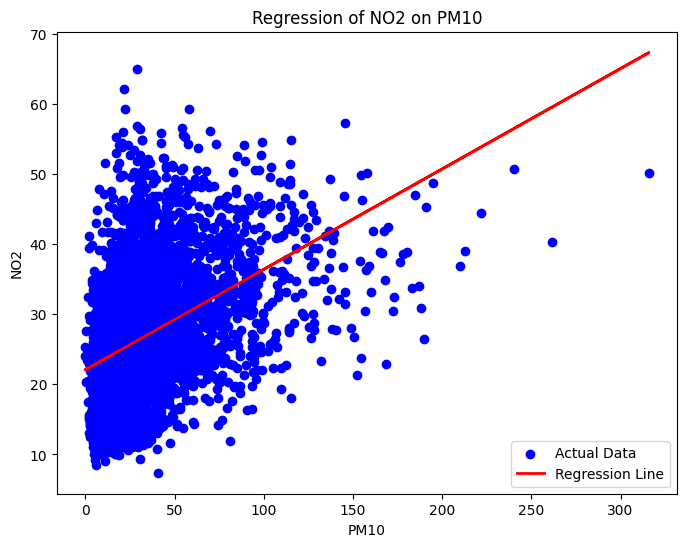

Regression of 'PM10' on 'NO2':
  Intercept: -5.51
  Coefficient for 'NO2': 1.35
  Mean Squared Error: 603.10
  R-squared: 0.19


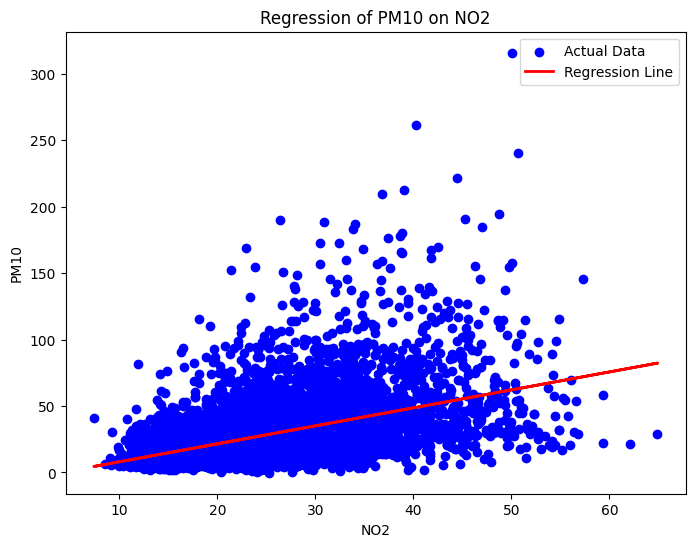


Regression of 'SO2' on 'PM10':
  Intercept: 7.02
  Coefficient for 'PM10': 0.10
  Mean Squared Error: 38.20
  R-squared: 0.16


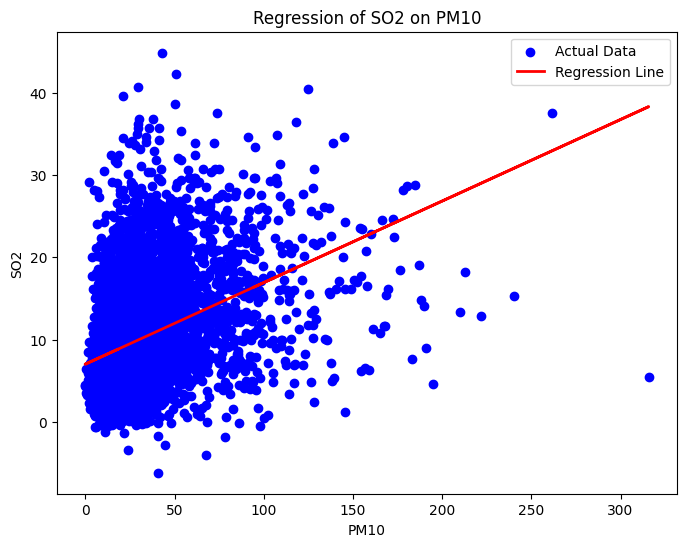

Regression of 'PM10' on 'SO2':
  Intercept: 13.91
  Coefficient for 'SO2': 1.63
  Mean Squared Error: 627.07
  R-squared: 0.16


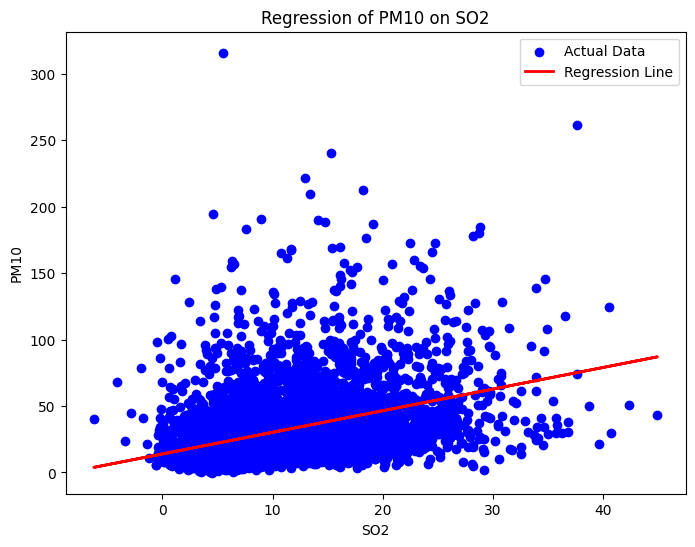


Regression of 'CO' on 'PM10':
  Intercept: 1.19
  Coefficient for 'PM10': 0.01
  Mean Squared Error: 0.22
  R-squared: 0.27


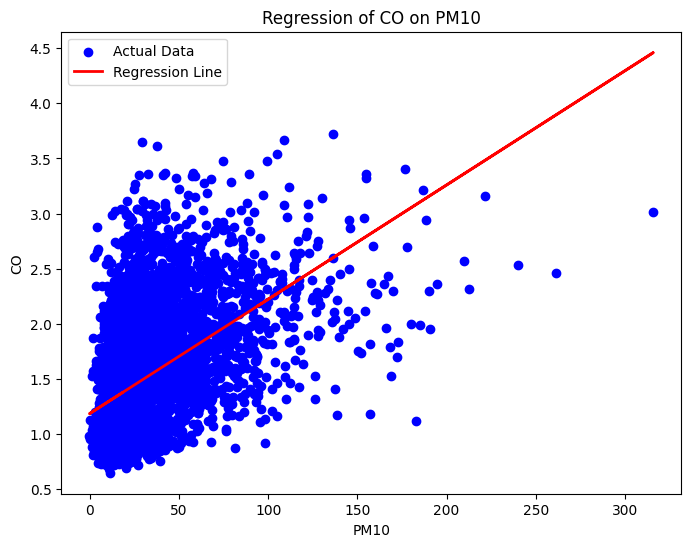

Regression of 'PM10' on 'CO':
  Intercept: -8.78
  Coefficient for 'CO': 25.99
  Mean Squared Error: 546.47
  R-squared: 0.27


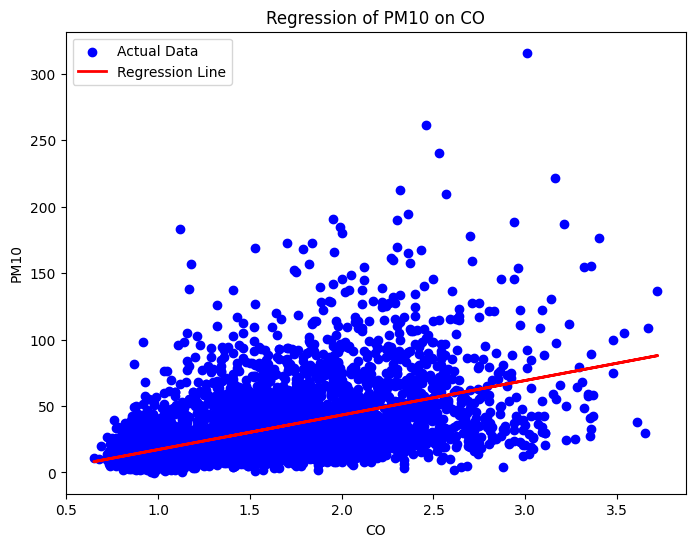


Regression of 'Proximity_to_Industrial_Areas' on 'PM10':
  Intercept: 10.12
  Coefficient for 'PM10': -0.06
  Mean Squared Error: 10.68
  R-squared: 0.18


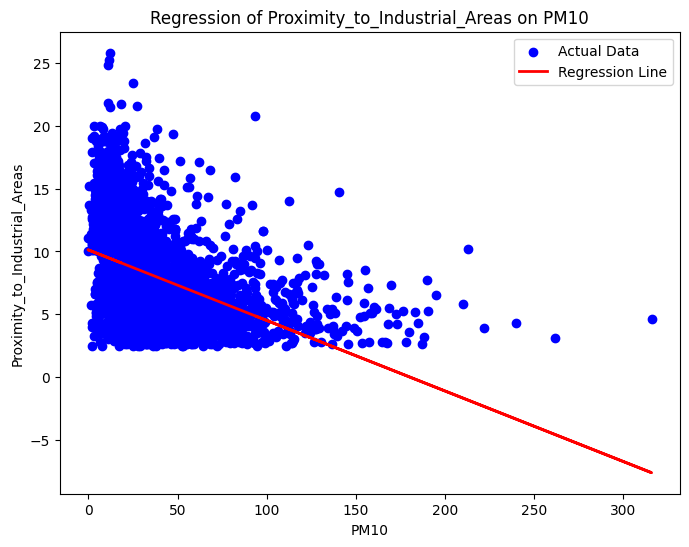

Regression of 'PM10' on 'Proximity_to_Industrial_Areas':
  Intercept: 57.34
  Coefficient for 'Proximity_to_Industrial_Areas': -3.22
  Mean Squared Error: 612.74
  R-squared: 0.18


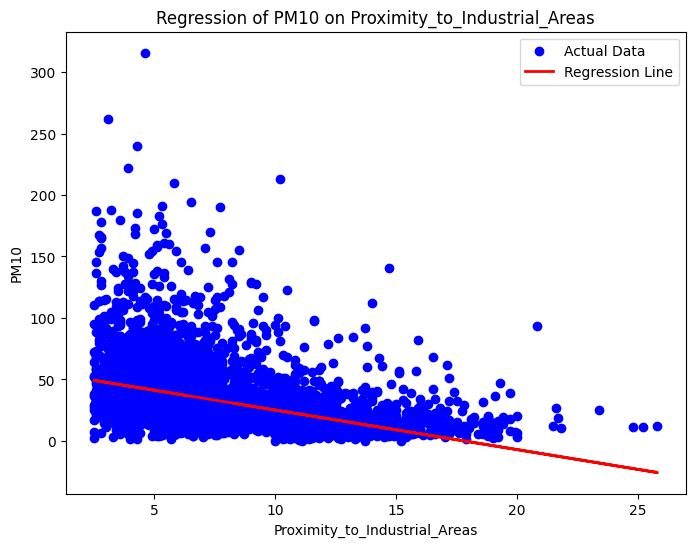


Regression of 'Population_Density' on 'PM10':
  Intercept: 435.70
  Coefficient for 'PM10': 2.04
  Mean Squared Error: 20208.61
  R-squared: 0.13


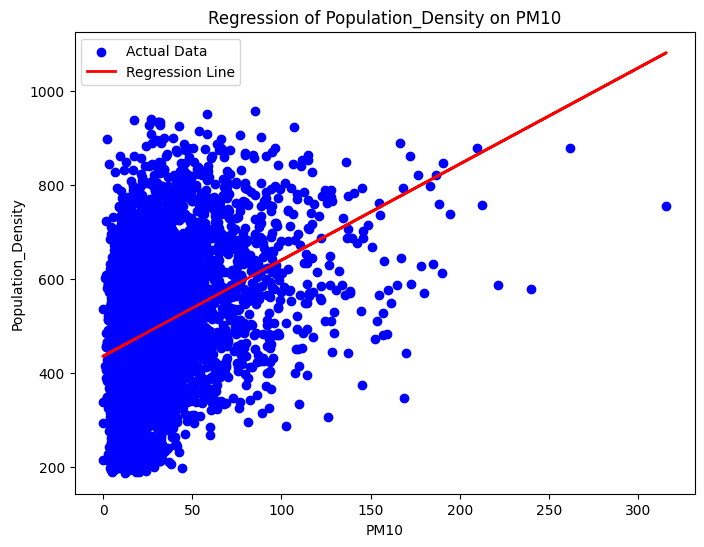

Regression of 'PM10' on 'Population_Density':
  Intercept: -2.35
  Coefficient for 'Population_Density': 0.07
  Mean Squared Error: 647.80
  R-squared: 0.13


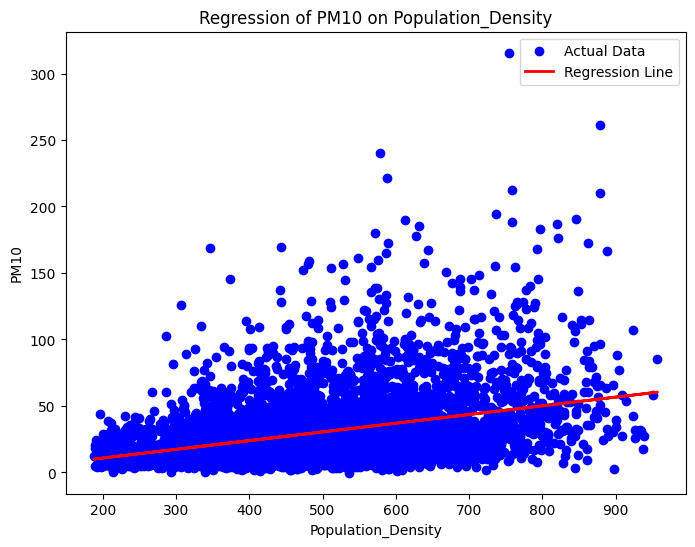


Regression of 'SO2' on 'NO2':
  Intercept: -1.45
  Coefficient for 'NO2': 0.43
  Mean Squared Error: 30.66
  R-squared: 0.33


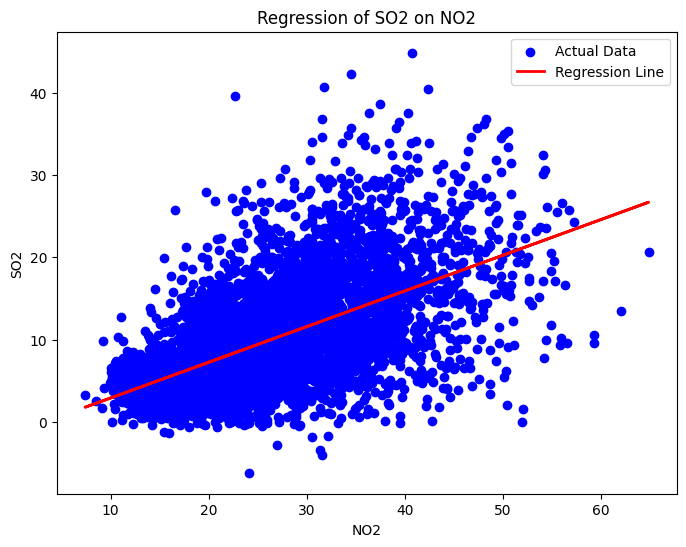

Regression of 'NO2' on 'SO2':
  Intercept: 18.87
  Coefficient for 'SO2': 0.75
  Mean Squared Error: 53.24
  R-squared: 0.33


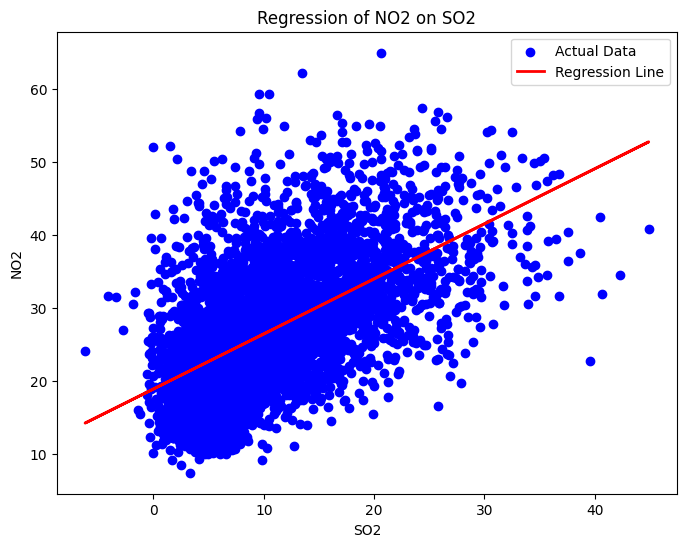


Regression of 'CO' on 'NO2':
  Intercept: 0.35
  Coefficient for 'NO2': 0.04
  Mean Squared Error: 0.15
  R-squared: 0.51


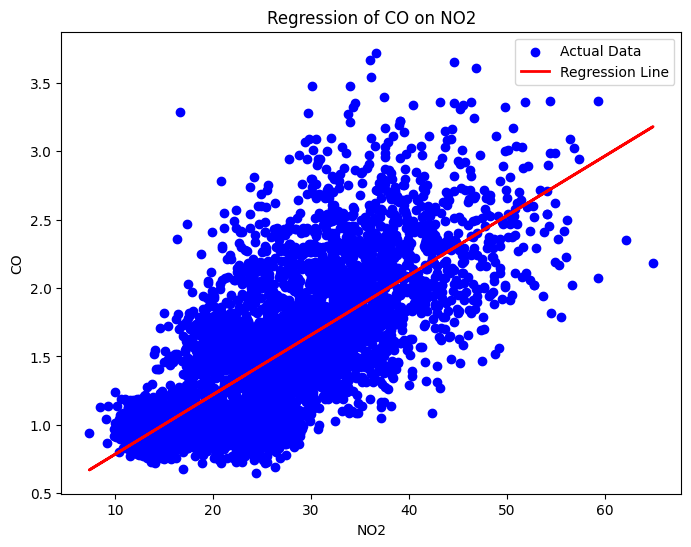

Regression of 'NO2' on 'CO':
  Intercept: 9.04
  Coefficient for 'CO': 11.58
  Mean Squared Error: 39.14
  R-squared: 0.51


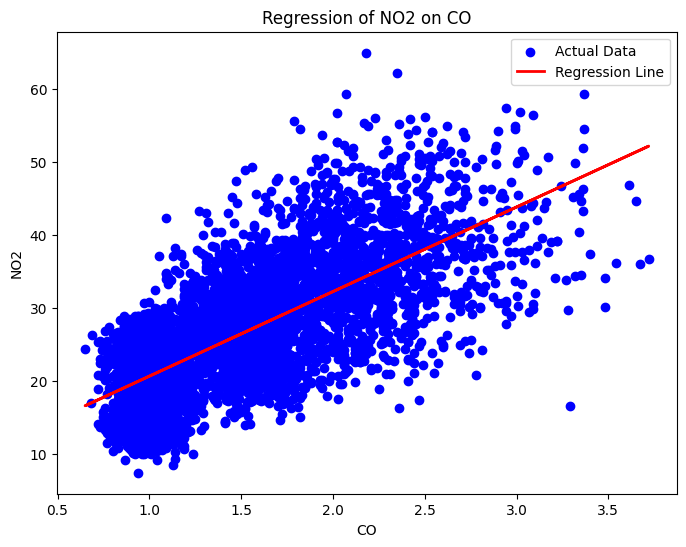


Regression of 'Proximity_to_Industrial_Areas' on 'NO2':
  Intercept: 14.94
  Coefficient for 'NO2': -0.25
  Mean Squared Error: 8.22
  R-squared: 0.37


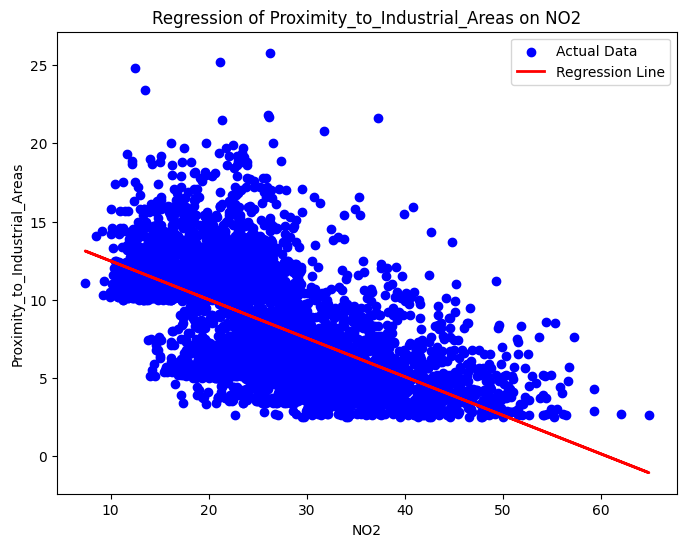

Regression of 'NO2' on 'Proximity_to_Industrial_Areas':
  Intercept: 39.03
  Coefficient for 'Proximity_to_Industrial_Areas': -1.50
  Mean Squared Error: 49.89
  R-squared: 0.37


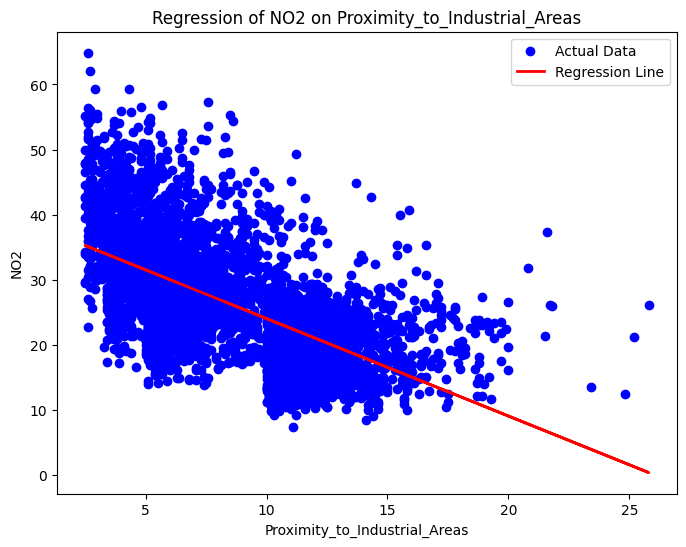


Regression of 'Population_Density' on 'NO2':
  Intercept: 265.68
  Coefficient for 'NO2': 8.77
  Mean Squared Error: 17238.89
  R-squared: 0.26


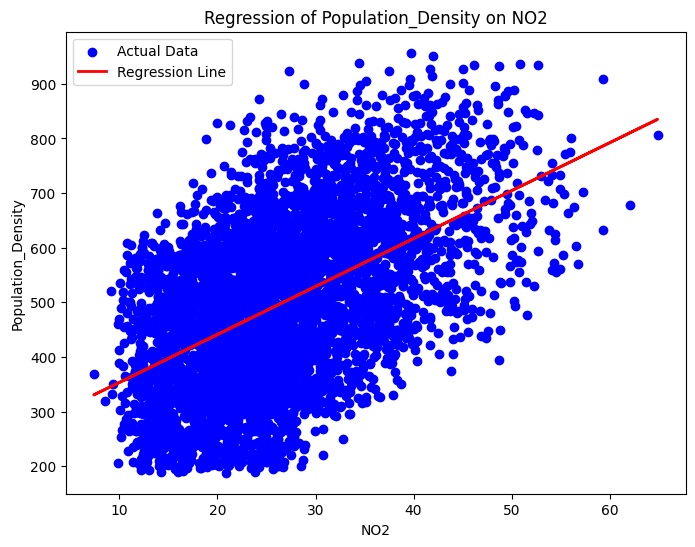

Regression of 'NO2' on 'Population_Density':
  Intercept: 11.61
  Coefficient for 'Population_Density': 0.03
  Mean Squared Error: 58.46
  R-squared: 0.26


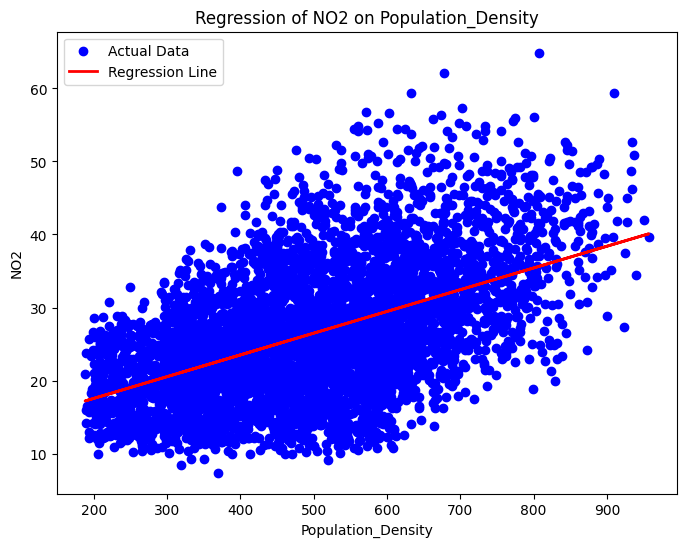


Regression of 'CO' on 'SO2':
  Intercept: 0.95
  Coefficient for 'SO2': 0.05
  Mean Squared Error: 0.16
  R-squared: 0.46


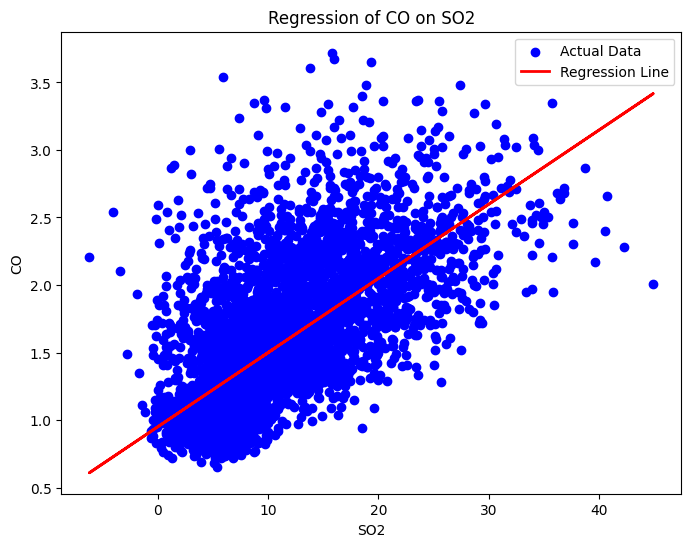

Regression of 'SO2' on 'CO':
  Intercept: -2.58
  Coefficient for 'CO': 8.39
  Mean Squared Error: 24.55
  R-squared: 0.46


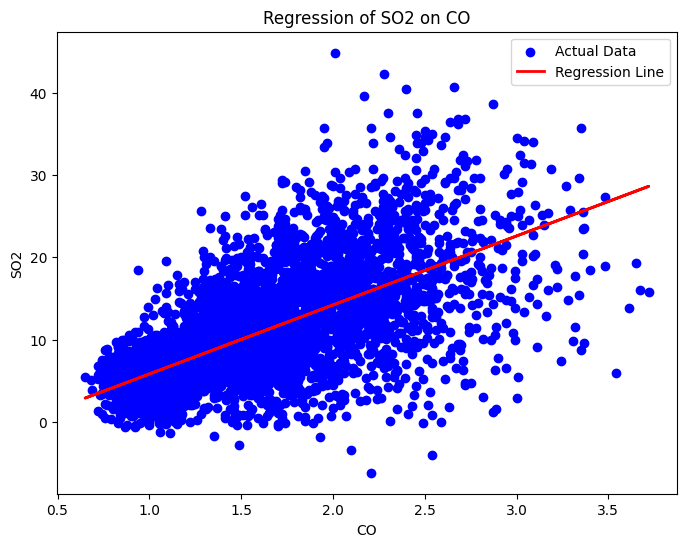


Regression of 'Proximity_to_Industrial_Areas' on 'SO2':
  Intercept: 11.48
  Coefficient for 'SO2': -0.31
  Mean Squared Error: 8.80
  R-squared: 0.33


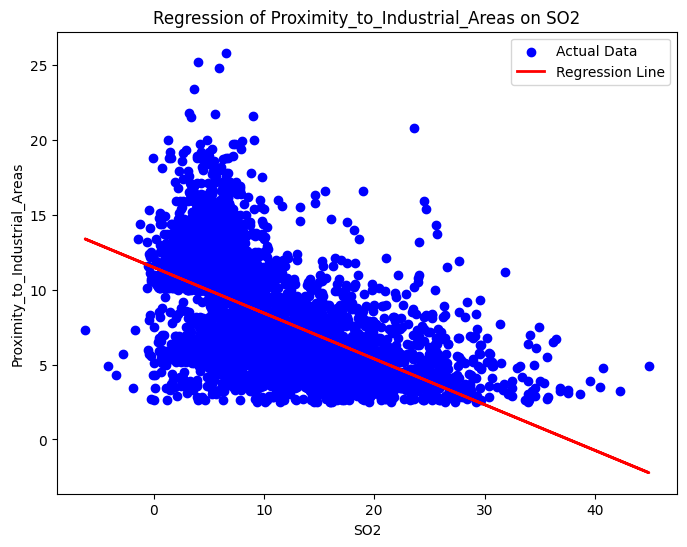

Regression of 'SO2' on 'Proximity_to_Industrial_Areas':
  Intercept: 19.00
  Coefficient for 'Proximity_to_Industrial_Areas': -1.07
  Mean Squared Error: 30.74
  R-squared: 0.33


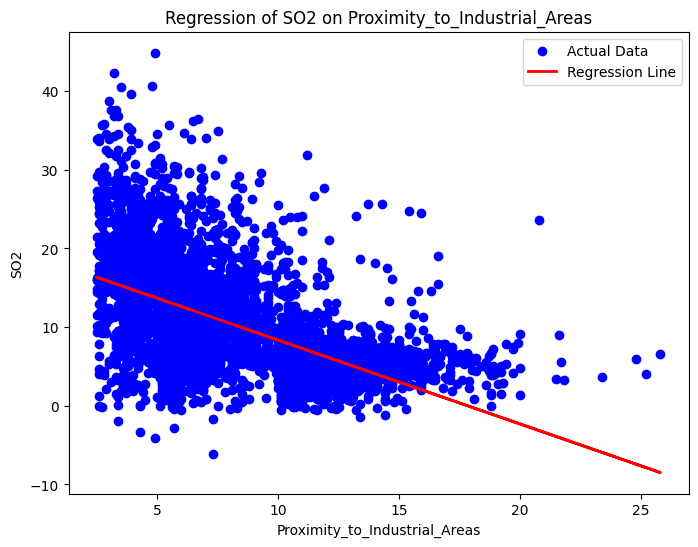


Regression of 'Population_Density' on 'SO2':
  Intercept: 389.72
  Coefficient for 'SO2': 10.75
  Mean Squared Error: 18060.15
  R-squared: 0.23


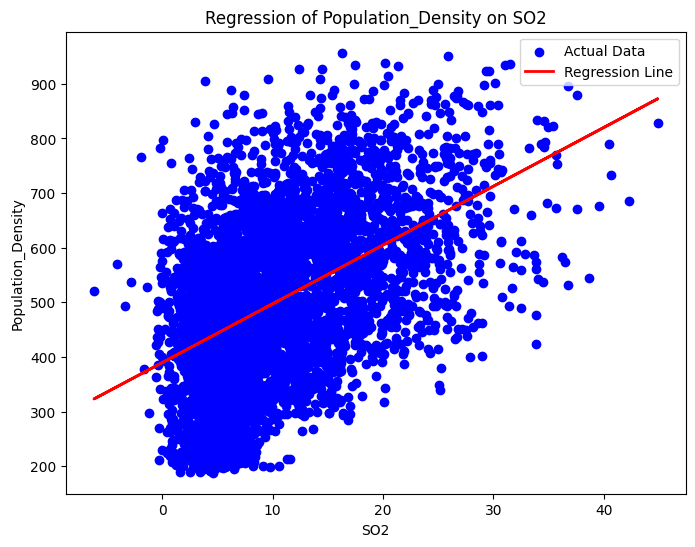

Regression of 'SO2' on 'Population_Density':
  Intercept: -0.43
  Coefficient for 'Population_Density': 0.02
  Mean Squared Error: 35.27
  R-squared: 0.23


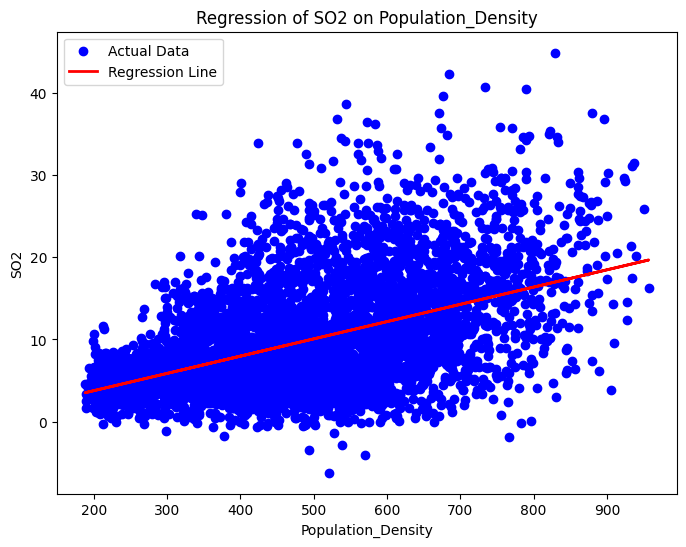


Regression of 'Proximity_to_Industrial_Areas' on 'CO':
  Intercept: 15.45
  Coefficient for 'CO': -4.68
  Mean Squared Error: 6.51
  R-squared: 0.50


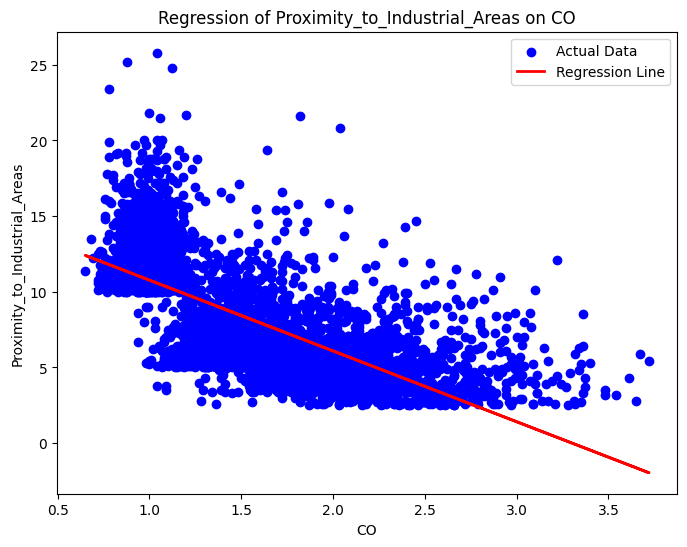

Regression of 'CO' on 'Proximity_to_Industrial_Areas':
  Intercept: 2.40
  Coefficient for 'Proximity_to_Industrial_Areas': -0.11
  Mean Squared Error: 0.15
  R-squared: 0.50


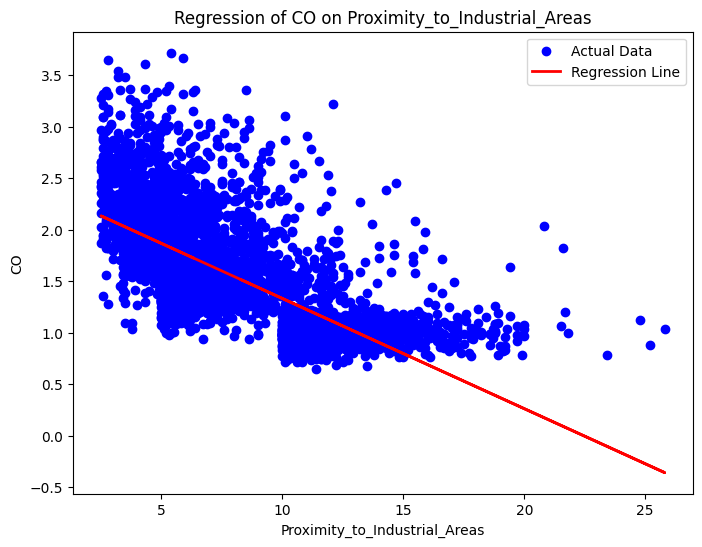


Regression of 'Population_Density' on 'CO':
  Intercept: 248.36
  Coefficient for 'CO': 166.00
  Mean Squared Error: 15114.70
  R-squared: 0.35


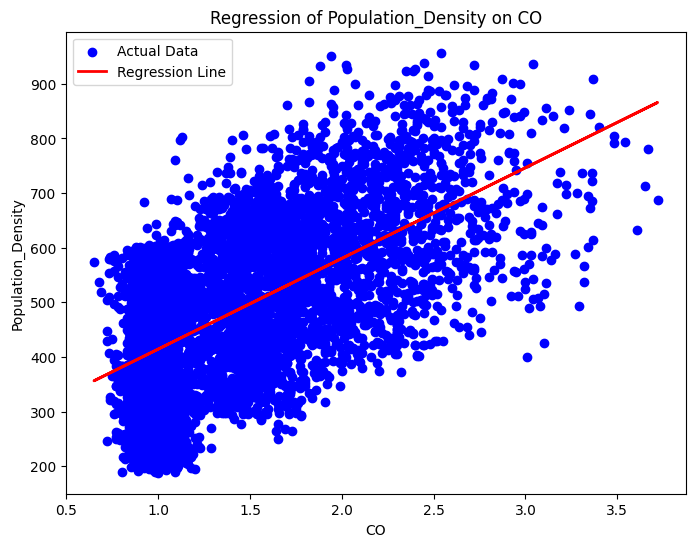

Regression of 'CO' on 'Population_Density':
  Intercept: 0.45
  Coefficient for 'Population_Density': 0.00
  Mean Squared Error: 0.19
  R-squared: 0.35


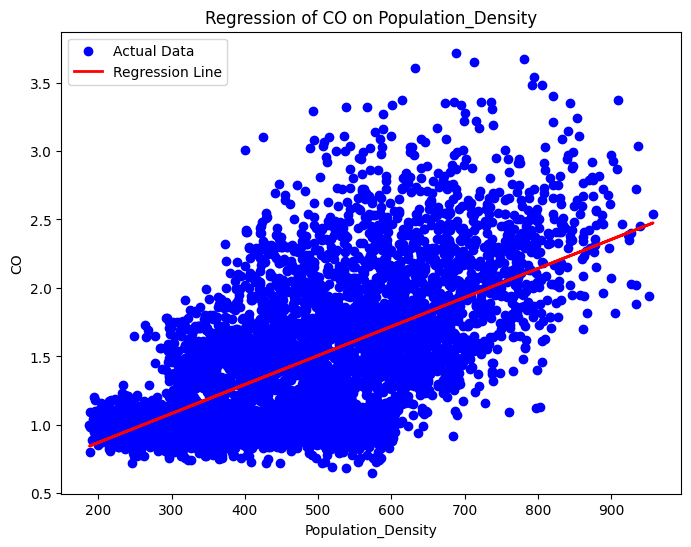


Regression of 'Population_Density' on 'Proximity_to_Industrial_Areas':
  Intercept: 674.94
  Coefficient for 'Proximity_to_Industrial_Areas': -21.07
  Mean Squared Error: 17542.06
  R-squared: 0.25


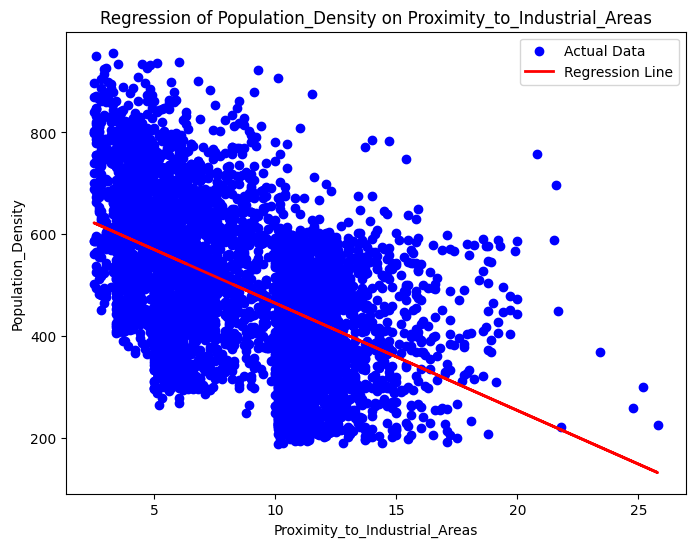

Regression of 'Proximity_to_Industrial_Areas' on 'Population_Density':
  Intercept: 14.28
  Coefficient for 'Population_Density': -0.01
  Mean Squared Error: 9.80
  R-squared: 0.25


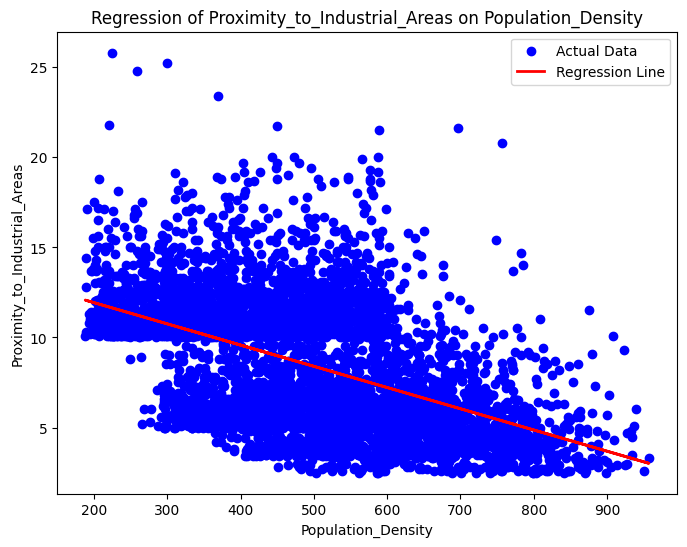

In [37]:
import matplotlib.pyplot as plt
columns_to_regress = df_new.columns.tolist()

if 'Air_Quality_Numeric' in columns_to_regress:
    columns_to_regress.remove('Air_Quality_Numeric')

print("Performing regression for the following columns:", columns_to_regress)

for i in range(len(columns_to_regress)):
    for j in range(i + 1, len(columns_to_regress)):
        col1_name = columns_to_regress[i]
        col2_name = columns_to_regress[j]

        X1 = df_new[[col1_name]]
        y1 = df_new[col2_name]

        model1 = LinearRegression()
        model1.fit(X1, y1)
        y1_pred = model1.predict(X1)

        print(f"\nRegression of '{col2_name}' on '{col1_name}':")
        print(f"  Intercept: {model1.intercept_:.2f}")
        print(f"  Coefficient for '{col1_name}': {model1.coef_[0]:.2f}")
        print(f"  Mean Squared Error: {mean_squared_error(y1, y1_pred):.2f}")
        print(f"  R-squared: {r2_score(y1, y1_pred):.2f}")



        plt.figure(figsize=(8, 6))
        plt.scatter(X1, y1, color='blue', label='Actual Data')
        plt.plot(X1, y1_pred, color='red', linewidth=2, label='Regression Line')
        plt.xlabel(col1_name)
        plt.ylabel(col2_name)
        plt.title(f"Regression of {col2_name} on {col1_name}")
        plt.legend()
        plt.show()

        X2 = df_new[[col2_name]]
        y2 = df_new[col1_name]

        model2 = LinearRegression()
        model2.fit(X2, y2)
        y2_pred = model2.predict(X2)

        print(f"Regression of '{col1_name}' on '{col2_name}':")
        print(f"  Intercept: {model2.intercept_:.2f}")
        print(f"  Coefficient for '{col2_name}': {model2.coef_[0]:.2f}")
        print(f"  Mean Squared Error: {mean_squared_error(y2, y2_pred):.2f}")
        print(f"  R-squared: {r2_score(y2, y2_pred):.2f}")
        plt.figure(figsize=(8, 6))
        plt.scatter(X2, y2, color='blue', label='Actual Data')
        plt.plot(X2, y2_pred, color='red', linewidth=2, label='Regression Line')
        plt.xlabel(col2_name)
        plt.ylabel(col1_name)
        plt.title(f"Regression of {col1_name} on {col2_name}")
        plt.legend()
        plt.show()

The code above show the regression analysis of our dataset.